In [4]:
import pandas as pd
import numpy as np

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values
# Mean and standard deviation for scaling
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)

# Standardize features
X_data_scaled = (X_data - means) / stds
# Split data into training and test sets
np.random.seed(42)
indices = np.arange(X_data_scaled.shape[0])
np.random.shuffle(indices)

split = int(0.7 * X_data_scaled.shape[0])
train_indices = indices[:split]
test_indices = indices[split:]

X_train = X_data_scaled[train_indices]
y_train = y_data[train_indices]
X_test = X_data_scaled[test_indices]
y_test = y_data[test_indices]
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)
            
            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Train the model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Predict with the model
y_pred = model.predict(X_test)
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 10 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f"Accuracy: {accuracy:.4f}\n" \
           f"Precision: {precision:.4f}\n" \
           f"Recall: {recall:.4f}\n" \
           f"F1 Score: {f1_score:.4f}\n"

# Evaluate the model
accuracy_dt = accuracy(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Accuracy of Logistic Regression model: ", accuracy_dt)
print("Confusion Matrix:\n", cm)


Classification Report:
 Accuracy: 0.8614
Precision: 0.5455
Recall: 0.0779
F1 Score: 0.6818

Accuracy of Logistic Regression model:  0.8614402917046491
Confusion Matrix:
 [[933  10]
 [142  12]]


Classification Report:
 Accuracy: 0.8614
Precision: 0.5455
Recall: 0.0779
F1 Score: 0.6818

Accuracy of Logistic Regression model:  0.8614402917046491
Confusion Matrix:
 [[933  10]
 [142  12]]


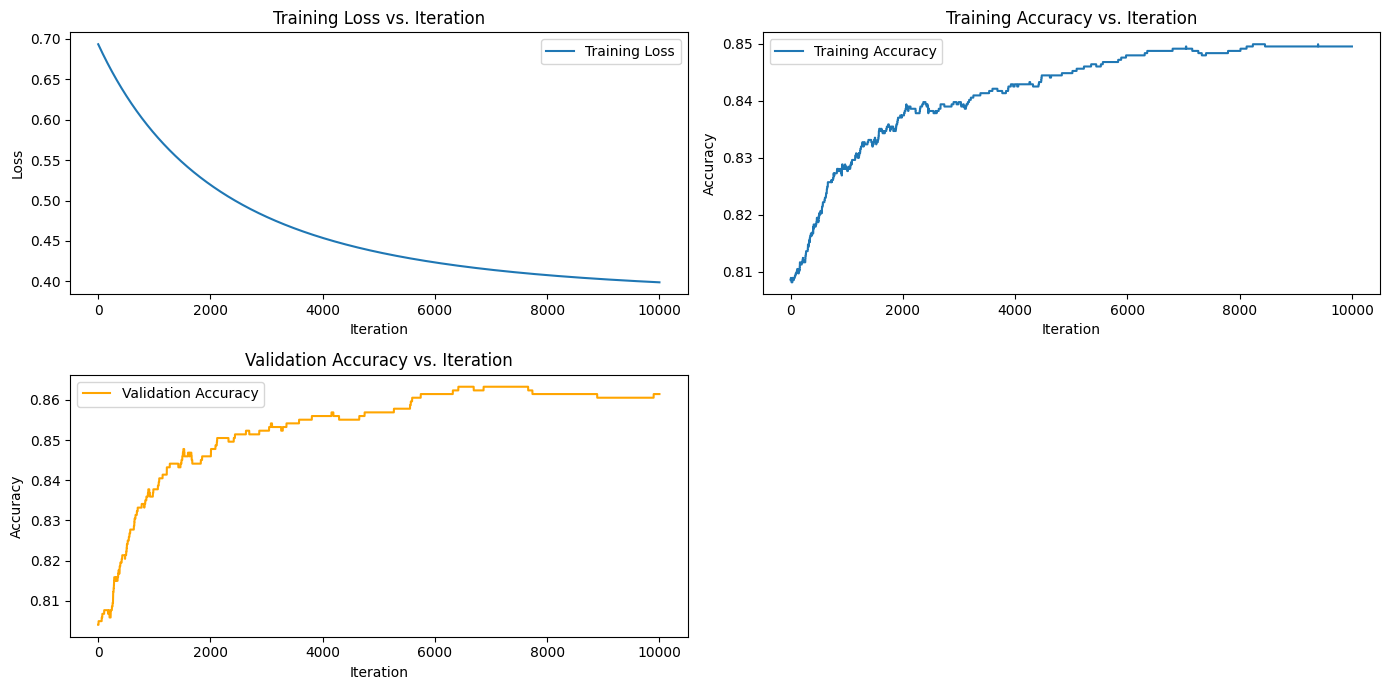

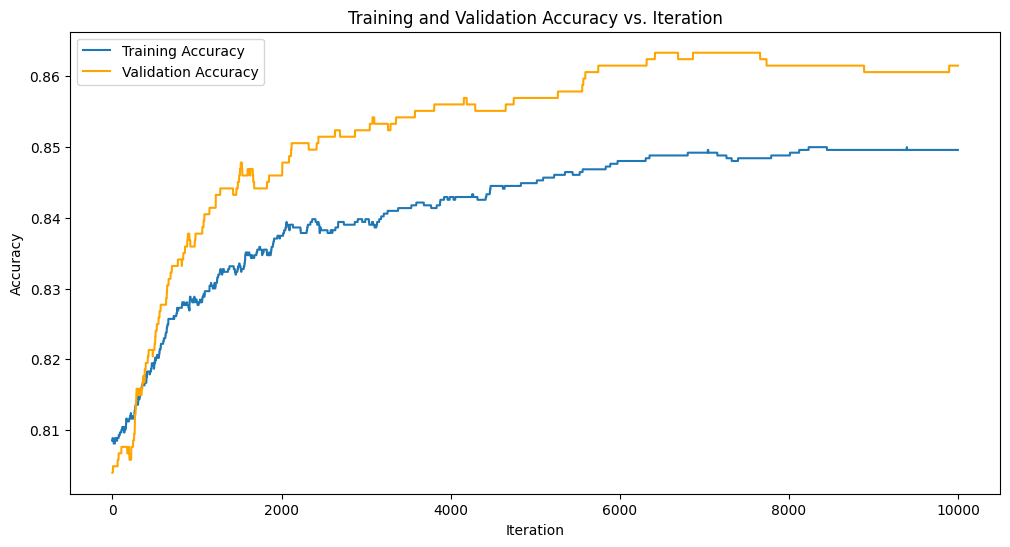

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Mean and standard deviation for scaling
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)

# Standardize features
X_data_scaled = (X_data - means) / stds

# Split data into training and test sets
np.random.seed(42)
indices = np.arange(X_data_scaled.shape[0])
np.random.shuffle(indices)

split = int(0.7 * X_data_scaled.shape[0])
train_indices = indices[:split]
test_indices = indices[split:]

X_train = X_data_scaled[train_indices]
y_train = y_data[train_indices]
X_test = X_data_scaled[test_indices]
y_test = y_data[test_indices]

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss and accuracy
            loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
            self.losses.append(loss)
            
            train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y)
            self.train_accuracies.append(train_accuracy)
            
            # Validation accuracy
            val_predictions = self.sigmoid(np.dot(X_test, self.weights) + self.bias)
            val_accuracy = np.mean(np.round(val_predictions) == y_test)
            self.val_accuracies.append(val_accuracy)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Train the model
model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model.fit(X_train, y_train)

# Predict with the model
y_pred = model.predict(X_test)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 10 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f"Accuracy: {accuracy:.4f}\n" \
           f"Precision: {precision:.4f}\n" \
           f"Recall: {recall:.4f}\n" \
           f"F1 Score: {f1_score:.4f}\n"

# Evaluate the model
accuracy_dt = accuracy(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Accuracy of Logistic Regression model: ", accuracy_dt)
print("Confusion Matrix:\n", cm)

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.plot(model.losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(model.train_accuracies, label='Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Iteration')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Training Accuracy and Validation Accuracy vs. Iteration
plt.plot(model.train_accuracies, label='Training Accuracy')
plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()

plt.show()


Classification Report:
 Accuracy: 0.8634
Precision: 0.3571
Recall: 0.0704
F1 Score: 0.5882

Accuracy of Logistic Regression model:  0.8633879781420765
Confusion Matrix:
 [[469   9]
 [ 66   5]]


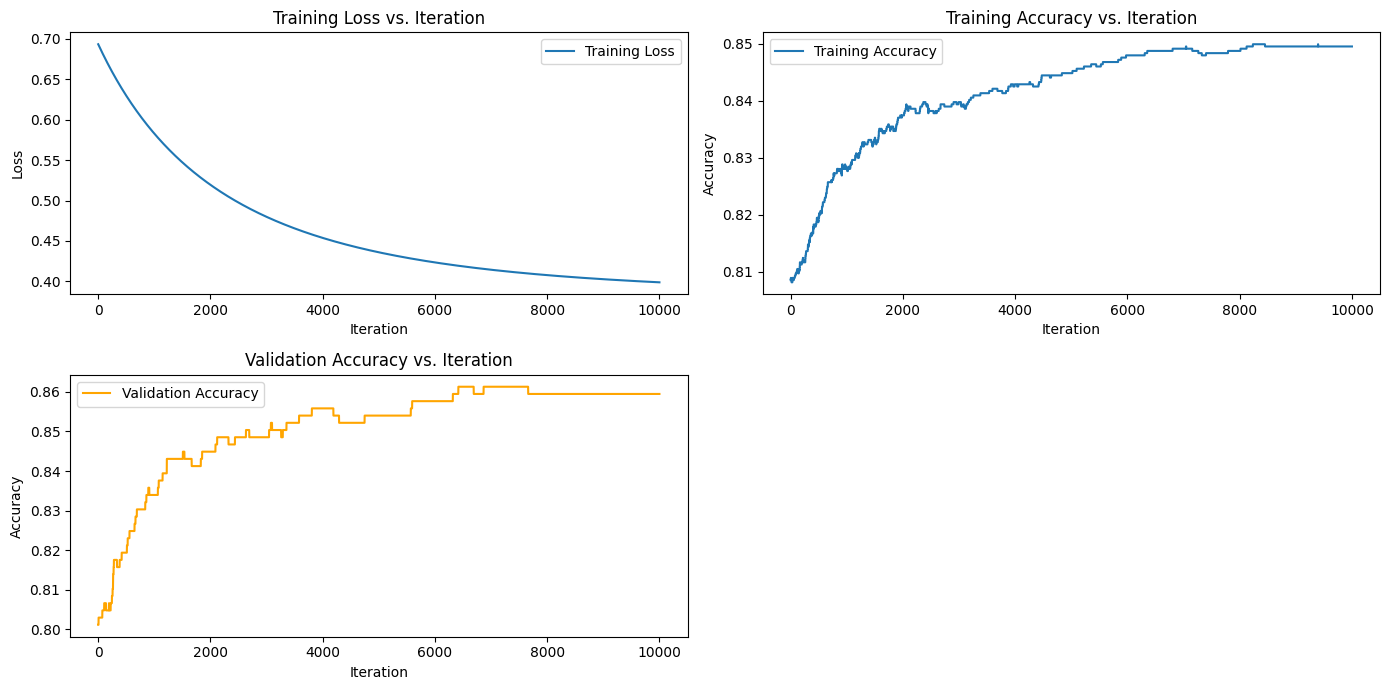

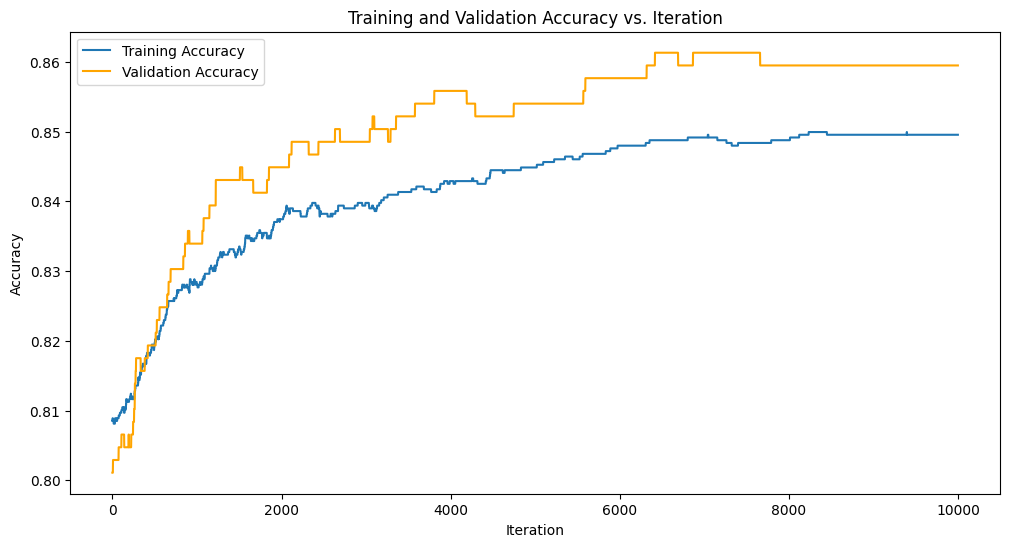

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Mean and standard deviation for scaling
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)

# Standardize features
X_data_scaled = (X_data - means) / stds

# Split data into training, validation, and test sets
np.random.seed(42)
indices = np.arange(X_data_scaled.shape[0])
np.random.shuffle(indices)

split_train = int(0.7 * X_data_scaled.shape[0])
split_val = int(0.15 * X_data_scaled.shape[0]) + split_train

train_indices = indices[:split_train]
val_indices = indices[split_train:split_val]
test_indices = indices[split_val:]

X_train = X_data_scaled[train_indices]
y_train = y_data[train_indices]
X_val = X_data_scaled[val_indices]
y_val = y_data[val_indices]
X_test = X_data_scaled[test_indices]
y_test = y_data[test_indices]

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, X_val, y_val):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss and accuracy
            loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
            self.losses.append(loss)
            
            train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y)
            self.train_accuracies.append(train_accuracy)
            
            # Validation accuracy
            val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            val_accuracy = np.mean(np.round(val_predictions) == y_val)
            self.val_accuracies.append(val_accuracy)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Train the model
model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model.fit(X_train, y_train, X_val, y_val)

# Predict with the model
y_pred = model.predict(X_test)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 10 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f"Accuracy: {accuracy:.4f}\n" \
           f"Precision: {precision:.4f}\n" \
           f"Recall: {recall:.4f}\n" \
           f"F1 Score: {f1_score:.4f}\n"

# Evaluate the model
accuracy_dt = accuracy(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Accuracy of Logistic Regression model: ", accuracy_dt)
print("Confusion Matrix:\n", cm)

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.plot(model.losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(model.train_accuracies, label='Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Iteration')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Training Accuracy and Validation Accuracy vs. Iteration
plt.figure(figsize=(12, 6))
plt.plot(model.train_accuracies, label='Training Accuracy')
plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()
plt.show()


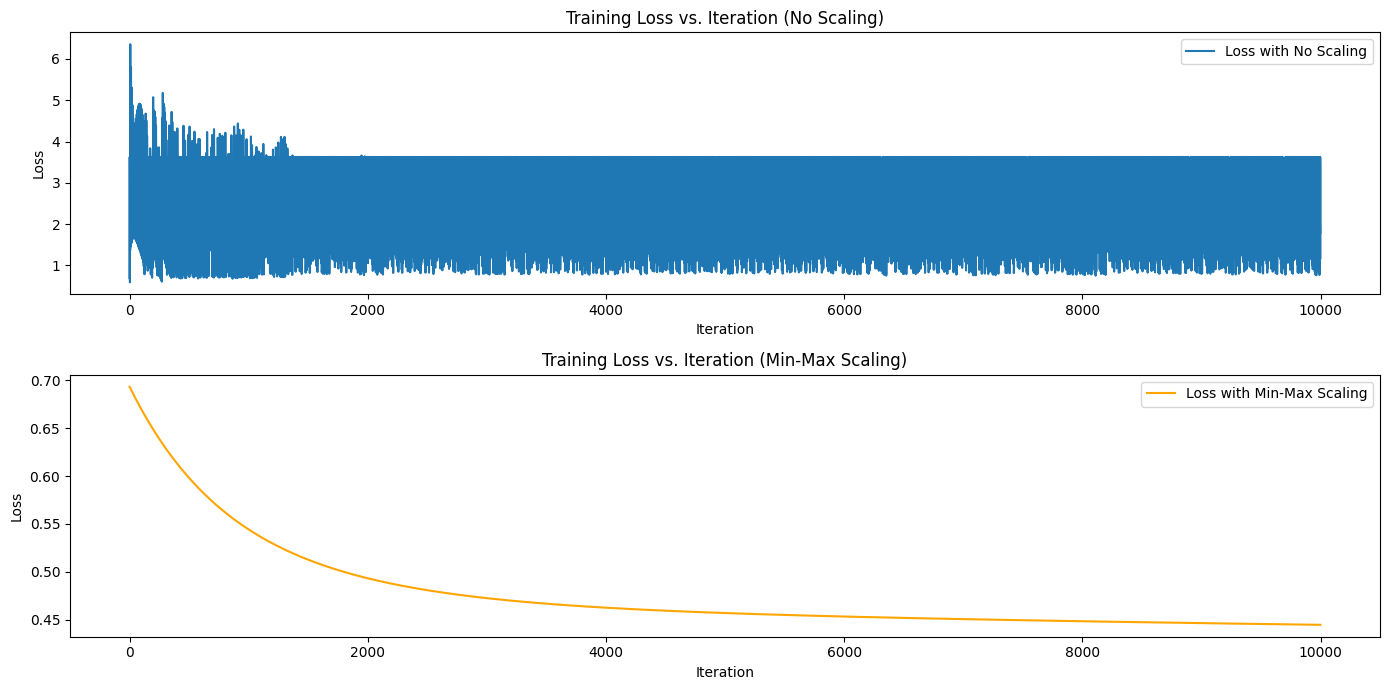

: 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Split data into training, validation, and test sets
np.random.seed(42)
indices = np.arange(X_data.shape[0])
np.random.shuffle(indices)

split_train = int(0.7 * X_data.shape[0])
split_val = int(0.15 * X_data.shape[0]) + split_train

train_indices = indices[:split_train]
val_indices = indices[split_train:split_val]
test_indices = indices[split_val:]

X_train = X_data[train_indices]
y_train = y_data[train_indices]
X_val = X_data[val_indices]
y_val = y_data[val_indices]
X_test = X_data[test_indices]
y_test = y_data[test_indices]

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X_train, y_train, X_val, y_val):
        m_train, n = X_train.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        for i in range(self.num_iterations):
            model_train = np.dot(X_train, self.weights) + self.bias
            predictions_train = self.sigmoid(model_train)

            # Compute gradients
            dw = (1 / m_train) * np.dot(X_train.T, (predictions_train - y_train))
            db = (1 / m_train) * np.sum(predictions_train - y_train)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss and accuracy
            loss = -np.mean(y_train * np.log(predictions_train + 1e-10) + (1 - y_train) * np.log(1 - predictions_train + 1e-10))
            self.losses.append(loss)
            
            train_predictions = self.sigmoid(np.dot(X_train, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y_train)
            self.train_accuracies.append(train_accuracy)
            
            # Validation accuracy
            val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            val_accuracy = np.mean(np.round(val_predictions) == y_val)
            self.val_accuracies.append(val_accuracy)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

def plot_results(losses_no_scaling, losses_min_max_scaling):
    plt.figure(figsize=(14, 7))
    
    plt.subplot(2, 1, 1)
    plt.plot(losses_no_scaling, label='Loss with No Scaling')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Iteration (No Scaling)')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(losses_min_max_scaling, label='Loss with Min-Max Scaling', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Iteration (Min-Max Scaling)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Logistic Regression with No Scaling
model_no_scaling = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model_no_scaling.fit(X_train, y_train, X_val, y_val)

# Logistic Regression with Min-Max Scaling
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_val_minmax = scaler.transform(X_val)
X_test_minmax = scaler.transform(X_test)

model_minmax_scaling = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model_minmax_scaling.fit(X_train_minmax, y_train, X_val_minmax, y_val)

# Plotting the results
plot_results(model_no_scaling.losses, model_minmax_scaling.losses)


Early stopping on iteration 12


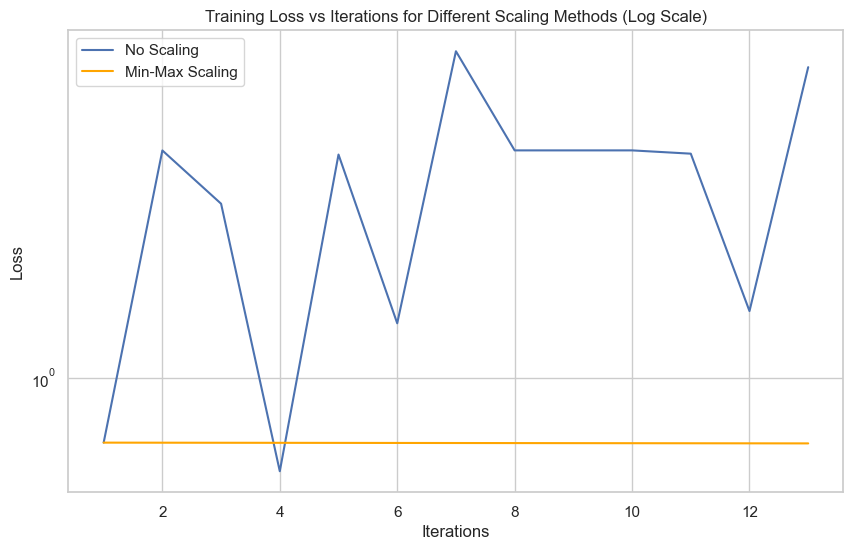

In [38]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

# # Define the updated plotting function with log scale
# def plot_loss_comparison(losses_no_scaling, losses_min_max_scaling):
#     # Determine the minimum length of cost arrays
#     min_length = min(len(losses_no_scaling), len(losses_min_max_scaling))
    
#     # Limit the iterations to the smallest loss array length
#     iterations = range(1, min_length + 1)
    
#     # Adjust each loss array to match the minimum length
#     losses_no_scaling = losses_no_scaling[:min_length]
#     losses_min_max_scaling = losses_min_max_scaling[:min_length]
    
#     plt.figure(figsize=(10, 6))
    
#     # Plot the losses for each scaling method with a logarithmic y-scale
#     plt.plot(iterations, losses_no_scaling, label='No Scaling')
#     plt.plot(iterations, losses_min_max_scaling, label='Min-Max Scaling', color='orange')
    
#     plt.ylabel('Loss')
#     plt.xlabel('Iterations')
#     plt.yscale('log')  # Apply logarithmic scale to y-axis
#     plt.legend()
#     plt.title('Training Loss vs Iterations for Different Scaling Methods (Log Scale)')
#     plt.show()

# # Logistic Regression with No Scaling
# model_no_scaling = LogisticRegression(learning_rate=0.001, num_iterations=10000)
# model_no_scaling.fit(X_train, y_train, X_val, y_val)

# # Logistic Regression with Min-Max Scaling
# scaler = MinMaxScaler()
# X_train_minmax = scaler.fit_transform(X_train)
# X_val_minmax = scaler.transform(X_val)
# X_test_minmax = scaler.transform(X_test)

# model_minmax_scaling = LogisticRegression(learning_rate=0.001, num_iterations=10000)
# model_minmax_scaling.fit(X_train_minmax, y_train, X_val_minmax, y_val)

# # Plotting the results
# plot_loss_comparison(model_no_scaling.losses, model_minmax_scaling.losses)


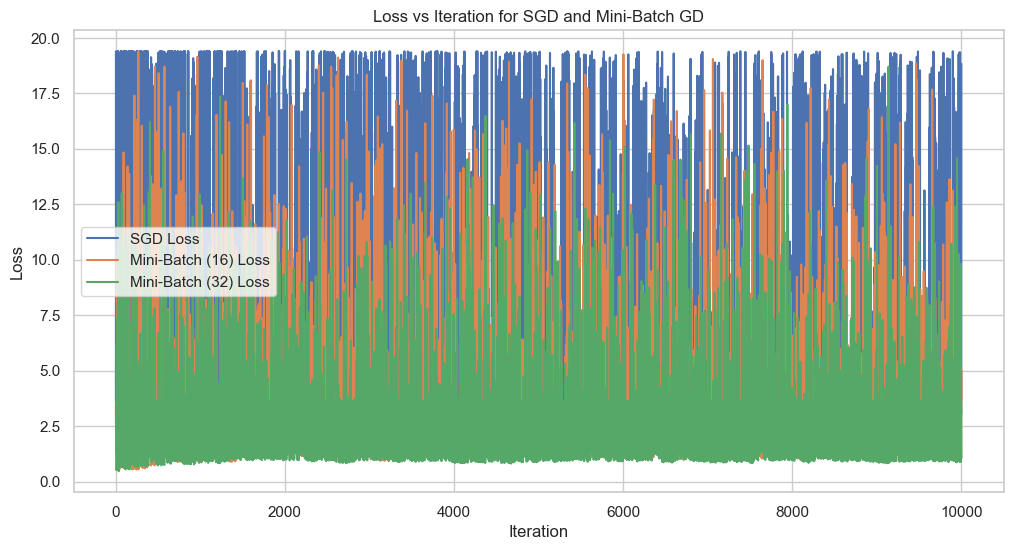

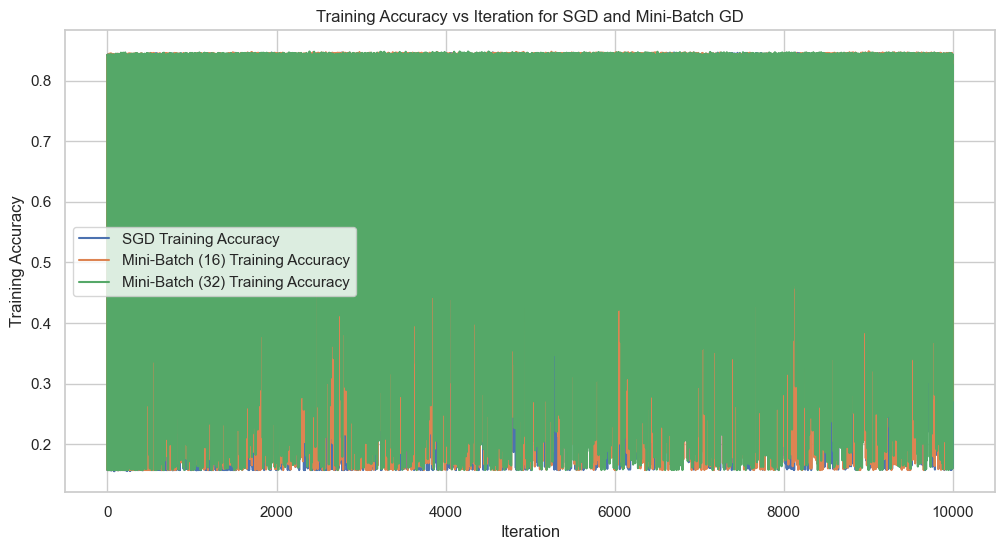

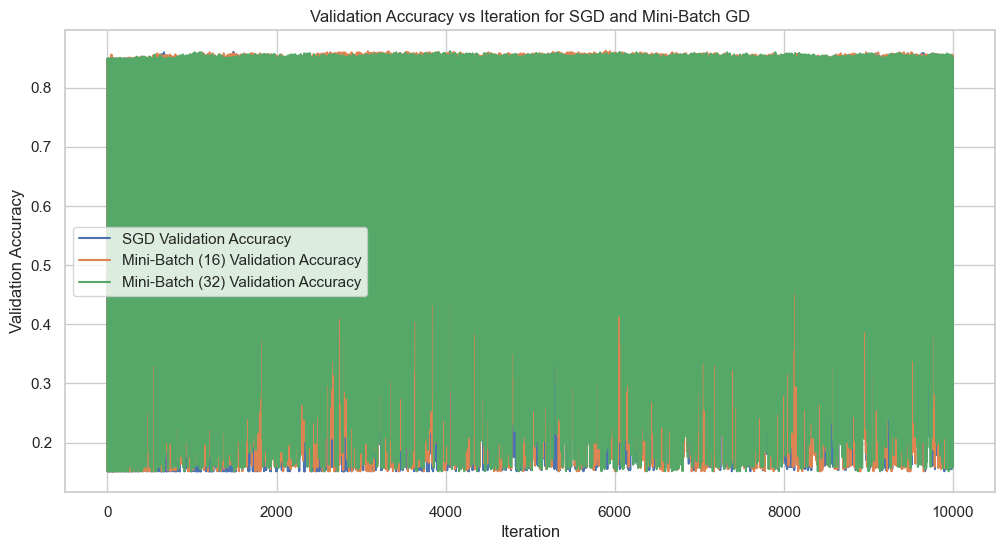

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.001, num_iterations=10000, batch_size=None, method="batch"):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size = batch_size
        self.method = method  # "batch", "sgd", "mini-batch"
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, X_val=None, y_val=None):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        for i in range(self.num_iterations):
            if self.method == "sgd":
                indices = np.random.randint(0, m, 1)
                X_batch = X[indices]
                y_batch = y[indices]
            elif self.method == "mini-batch" and self.batch_size is not None:
                indices = np.random.choice(m, self.batch_size, replace=False)
                X_batch = X[indices]
                y_batch = y[indices]
            else:
                X_batch, y_batch = X, y
            
            model = np.dot(X_batch, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / len(y_batch)) * np.dot(X_batch.T, (predictions - y_batch))
            db = (1 / len(y_batch)) * np.sum(predictions - y_batch)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss and accuracy for training set
            loss = -np.mean(y * np.log(self.sigmoid(np.dot(X, self.weights) + self.bias) + 1e-10) + (1 - y) * np.log(1 - self.sigmoid(np.dot(X, self.weights) + self.bias) + 1e-10))
            self.losses.append(loss)
            
            train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y)
            self.train_accuracies.append(train_accuracy)
            
            # Calculate validation accuracy if validation data is provided
            if X_val is not None:
                val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
                val_accuracy = np.mean(np.round(val_predictions) == y_val)
                self.val_accuracies.append(val_accuracy)

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Create models for each optimization method

# Stochastic Gradient Descent (SGD)
model_sgd = LogisticRegressionGD(learning_rate=0.001, num_iterations=10000, method="sgd")
model_sgd.fit(X_train, y_train, X_val, y_val)

# Mini-Batch Gradient Descent (batch size = 16)
model_minibatch_16 = LogisticRegressionGD(learning_rate=0.001, num_iterations=10000, batch_size=16, method="mini-batch")
model_minibatch_16.fit(X_train, y_train, X_val, y_val)

# Mini-Batch Gradient Descent (batch size = 32)
model_minibatch_32 = LogisticRegressionGD(learning_rate=0.001, num_iterations=10000, batch_size=32, method="mini-batch")
model_minibatch_32.fit(X_train, y_train, X_val, y_val)

# Plot Loss vs Iteration
plt.figure(figsize=(12, 6))
plt.plot(model_sgd.losses, label='SGD Loss')
plt.plot(model_minibatch_16.losses, label='Mini-Batch (16) Loss')
plt.plot(model_minibatch_32.losses, label='Mini-Batch (32) Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration for SGD and Mini-Batch GD')
plt.legend()
plt.show()

# Plot Training Accuracy vs Iteration
plt.figure(figsize=(12, 6))
plt.plot(model_sgd.train_accuracies, label='SGD Training Accuracy')
plt.plot(model_minibatch_16.train_accuracies, label='Mini-Batch (16) Training Accuracy')
plt.plot(model_minibatch_32.train_accuracies, label='Mini-Batch (32) Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Iteration for SGD and Mini-Batch GD')
plt.legend()
plt.show()

# Plot Validation Accuracy vs Iteration
plt.figure(figsize=(12, 6))
plt.plot(model_sgd.val_accuracies, label='SGD Validation Accuracy')
plt.plot(model_minibatch_16.val_accuracies, label='Mini-Batch (16) Validation Accuracy')
plt.plot(model_minibatch_32.val_accuracies, label='Mini-Batch (32) Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Iteration for SGD and Mini-Batch GD')
plt.legend()
plt.show()


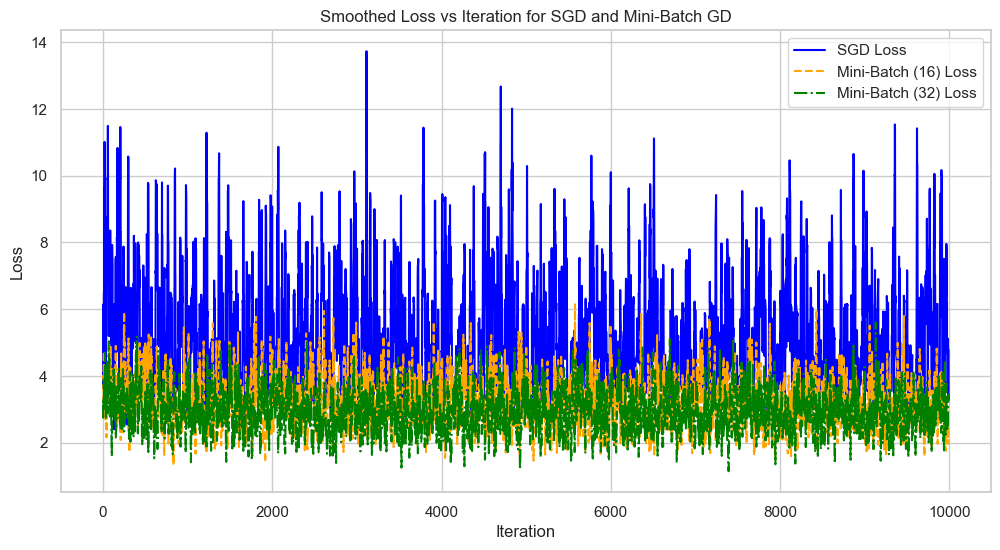

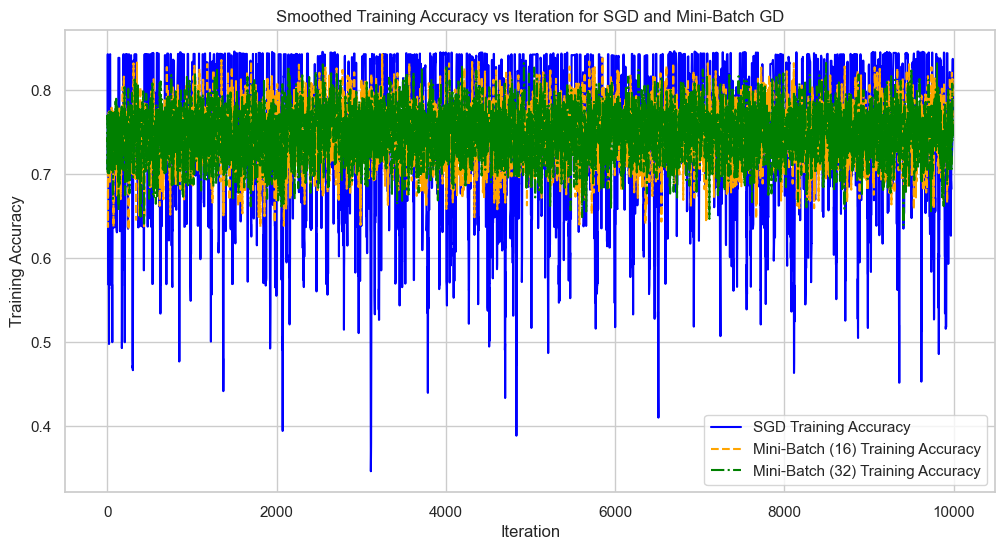

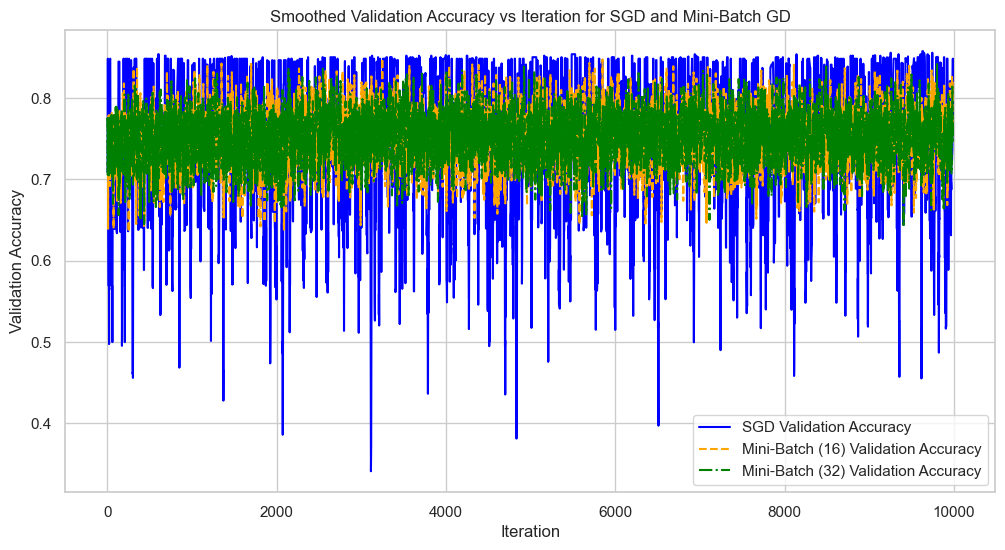

In [21]:
import seaborn as sns
sns.set(style="whitegrid")  # Use a clean grid style for better visualization

# Improved Plot for Loss vs Iteration with smoother lines
plt.figure(figsize=(12, 6))
plt.plot(np.convolve(model_sgd.losses, np.ones(10)/10, mode='valid'), label='SGD Loss', linestyle='-', color='blue')
plt.plot(np.convolve(model_minibatch_16.losses, np.ones(10)/10, mode='valid'), label='Mini-Batch (16) Loss', linestyle='--', color='orange')
plt.plot(np.convolve(model_minibatch_32.losses, np.ones(10)/10, mode='valid'), label='Mini-Batch (32) Loss', linestyle='-.', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Smoothed Loss vs Iteration for SGD and Mini-Batch GD')
plt.legend()
plt.grid(True)
plt.show()

# Improved Plot for Training Accuracy vs Iteration with smoother lines
plt.figure(figsize=(12, 6))
plt.plot(np.convolve(model_sgd.train_accuracies, np.ones(10)/10, mode='valid'), label='SGD Training Accuracy', linestyle='-', color='blue')
plt.plot(np.convolve(model_minibatch_16.train_accuracies, np.ones(10)/10, mode='valid'), label='Mini-Batch (16) Training Accuracy', linestyle='--', color='orange')
plt.plot(np.convolve(model_minibatch_32.train_accuracies, np.ones(10)/10, mode='valid'), label='Mini-Batch (32) Training Accuracy', linestyle='-.', color='green')
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Smoothed Training Accuracy vs Iteration for SGD and Mini-Batch GD')
plt.legend()
plt.grid(True)
plt.show()

# Improved Plot for Validation Accuracy vs Iteration with smoother lines
plt.figure(figsize=(12, 6))
plt.plot(np.convolve(model_sgd.val_accuracies, np.ones(10)/10, mode='valid'), label='SGD Validation Accuracy', linestyle='-', color='blue')
plt.plot(np.convolve(model_minibatch_16.val_accuracies, np.ones(10)/10, mode='valid'), label='Mini-Batch (16) Validation Accuracy', linestyle='--', color='orange')
plt.plot(np.convolve(model_minibatch_32.val_accuracies, np.ones(10)/10, mode='valid'), label='Mini-Batch (32) Validation Accuracy', linestyle='-.', color='green')
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy')
plt.title('Smoothed Validation Accuracy vs Iteration for SGD and Mini-Batch GD')
plt.legend()
plt.grid(True)
plt.show()


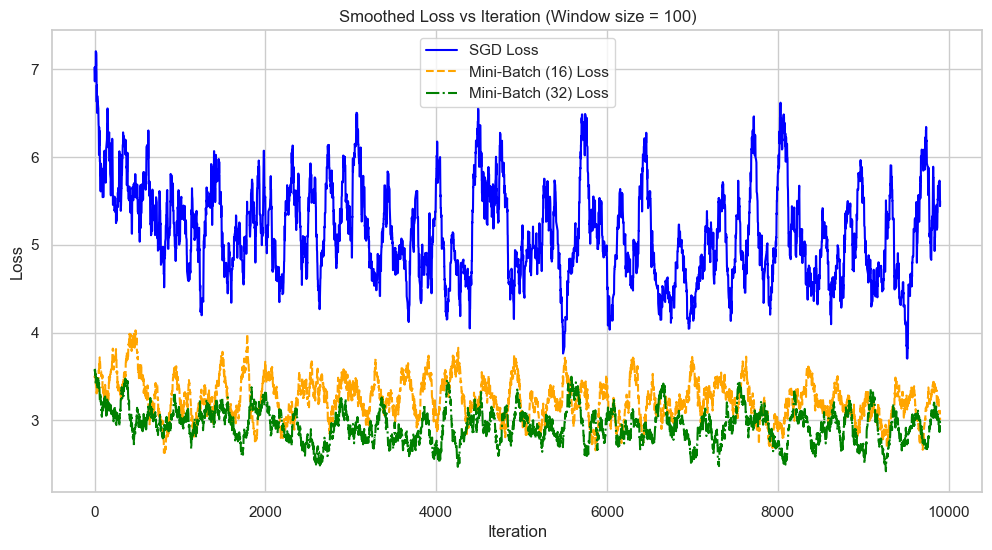

In [22]:
# Apply more smoothing by increasing the window size in np.convolve
def smooth(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Increased window size for smoothing
window_size = 100

# Smoothed Loss vs Iteration plot
plt.figure(figsize=(12, 6))
plt.plot(smooth(model_sgd.losses, window_size), label='SGD Loss', linestyle='-', color='blue')
plt.plot(smooth(model_minibatch_16.losses, window_size), label='Mini-Batch (16) Loss', linestyle='--', color='orange')
plt.plot(smooth(model_minibatch_32.losses, window_size), label='Mini-Batch (32) Loss', linestyle='-.', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title(f'Smoothed Loss vs Iteration (Window size = {window_size})')
plt.legend()
plt.grid(True)
plt.show()


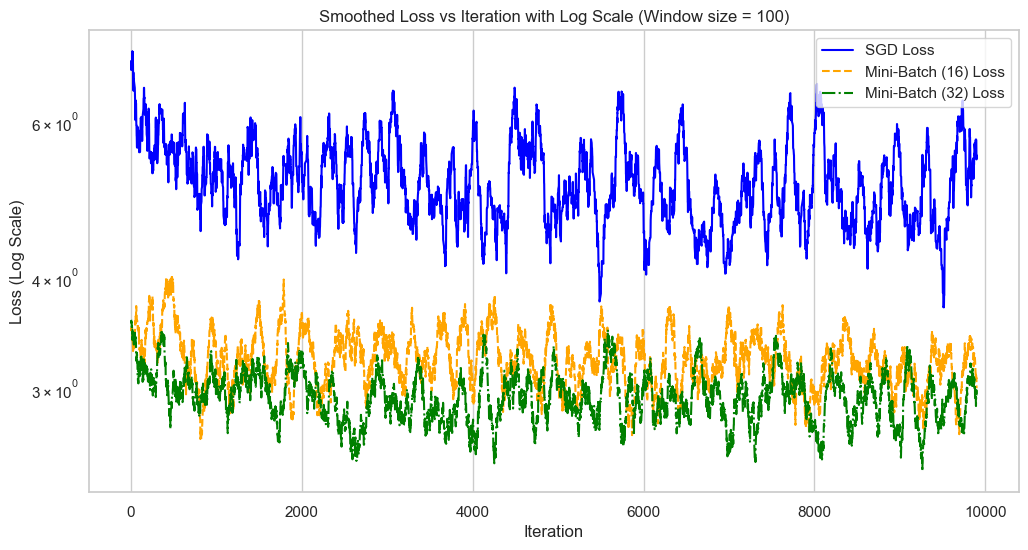

In [23]:
# Apply a log scale to the y-axis
plt.figure(figsize=(12, 6))
plt.plot(smooth(model_sgd.losses, window_size), label='SGD Loss', linestyle='-', color='blue')
plt.plot(smooth(model_minibatch_16.losses, window_size), label='Mini-Batch (16) Loss', linestyle='--', color='orange')
plt.plot(smooth(model_minibatch_32.losses, window_size), label='Mini-Batch (32) Loss', linestyle='-.', color='green')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Loss (Log Scale)')
plt.title(f'Smoothed Loss vs Iteration with Log Scale (Window size = {window_size})')
plt.legend()
plt.grid(True)
plt.show()


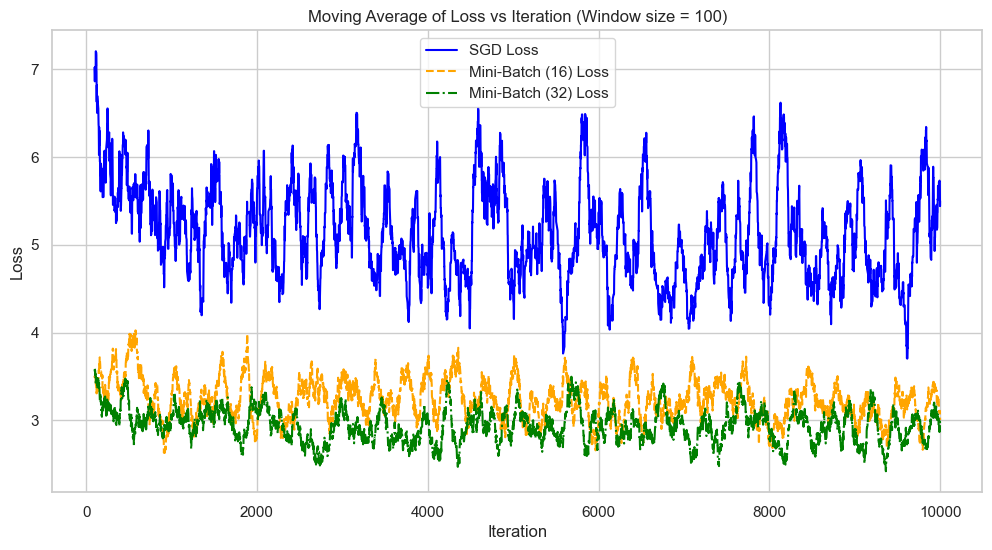

In [24]:
# Use pandas rolling mean to get a moving average of the loss values
import pandas as pd

window_size = 100  # Moving average window size

# Plot with rolling mean (moving average)
plt.figure(figsize=(12, 6))
plt.plot(pd.Series(model_sgd.losses).rolling(window=window_size).mean(), label='SGD Loss', linestyle='-', color='blue')
plt.plot(pd.Series(model_minibatch_16.losses).rolling(window=window_size).mean(), label='Mini-Batch (16) Loss', linestyle='--', color='orange')
plt.plot(pd.Series(model_minibatch_32.losses).rolling(window=window_size).mean(), label='Mini-Batch (32) Loss', linestyle='-.', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title(f'Moving Average of Loss vs Iteration (Window size = {window_size})')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Mean and standard deviation for scaling
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)

# Standardize features
X_data_scaled = (X_data - means) / stds

# Split data into training, validation, and test sets
np.random.seed(42)
indices = np.arange(X_data_scaled.shape[0])
np.random.shuffle(indices)

split_train = int(0.7 * X_data_scaled.shape[0])
split_val = int(0.15 * X_data_scaled.shape[0]) + split_train

train_indices = indices[:split_train]
val_indices = indices[split_train:split_val]
test_indices = indices[split_val:]

X_train = X_data_scaled[train_indices]
y_train = y_data[train_indices]
X_val = X_data_scaled[val_indices]
y_val = y_data[val_indices]
X_test = X_data_scaled[test_indices]
y_test = y_data[test_indices]

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, X_val, y_val):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss and accuracy
            loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
            self.losses.append(loss)
            
            train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y)
            self.train_accuracies.append(train_accuracy)
            
            # Validation accuracy
            val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            val_accuracy = np.mean(np.round(val_predictions) == y_val)
            self.val_accuracies.append(val_accuracy)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Train the model
model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model.fit(X_train, y_train, X_val, y_val)

# Predict with the model
y_pred = model.predict(X_test)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f"Accuracy: {accuracy:.4f}\n" \
           f"Precision: {precision:.4f}\n" \
           f"Recall: {recall:.4f}\n" \
           f"F1 Score: {f1_score:.4f}\n"

# Evaluate the model
accuracy_dt = accuracy(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the k-fold cross-validation process
def k_fold_cross_validation(X_data, y_data, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    fold = 1
    for train_index, test_index in kf.split(X_data):
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        
        # Initialize and train the model
        model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
        model.fit(X_train, y_train, X_test, y_test)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics for the current fold
        accuracy_fold = accuracy(y_test, y_pred)
        precision_fold = precision_score(y_test, y_pred)
        recall_fold = recall_score(y_test, y_pred)
        f1_fold = f1_score(y_test, y_pred)
        
        # Append results
        accuracies.append(accuracy_fold)
        precisions.append(precision_fold)
        recalls.append(recall_fold)
        f1_scores.append(f1_fold)
        
        print(f"Fold {fold} - Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1 Score: {f1_fold:.4f}")
        fold += 1
    
    # Calculate average and standard deviation for each metric
    avg_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    
    avg_precision = np.mean(precisions)
    std_precision = np.std(precisions)
    
    avg_recall = np.mean(recalls)
    std_recall = np.std(recalls)
    
    avg_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    
    print("\nK-Fold Cross-Validation Results (Average over 5 folds):")
    print(f"Accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {avg_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {avg_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {avg_f1:.4f} ± {std_f1:.4f}")
    
    return avg_accuracy, std_accuracy, avg_precision, std_precision, avg_recall, std_recall, avg_f1, std_f1

# Perform k-fold cross-validation
k_fold_cross_validation(X_data_scaled, y_data, k=5)


Fold 1 - Accuracy: 0.8347, Precision: 0.5385, Recall: 0.0574, F1 Score: 0.1037
Fold 2 - Accuracy: 0.8550, Precision: 0.5455, Recall: 0.0561, F1 Score: 0.1017
Fold 3 - Accuracy: 0.8468, Precision: 0.6000, Recall: 0.0526, F1 Score: 0.0968
Fold 4 - Accuracy: 0.8536, Precision: 0.7143, Recall: 0.0455, F1 Score: 0.0855
Fold 5 - Accuracy: 0.8591, Precision: 0.5294, Recall: 0.0865, F1 Score: 0.1488

K-Fold Cross-Validation Results (Average over 5 folds):
Accuracy: 0.8498 ± 0.0085
Precision: 0.5855 ± 0.0689
Recall: 0.0596 ± 0.0141
F1 Score: 0.1073 ± 0.0217


(0.8498400275092882,
 0.008545698041899363,
 0.5855227125815361,
 0.06893207244358832,
 0.059615280295168695,
 0.01408333129258757,
 0.1072806457109852,
 0.021682459411400436)

Early stopping on iteration 102
Classification Report with L2 Regularization:
 Accuracy: 0.8707
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Confusion Matrix with L2 Regularization:
 [[478   0]
 [ 71   0]]
Early stopping on iteration 102
Classification Report with L1 Regularization:
 Accuracy: 0.8707
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Confusion Matrix with L1 Regularization:
 [[478   0]
 [ 71   0]]


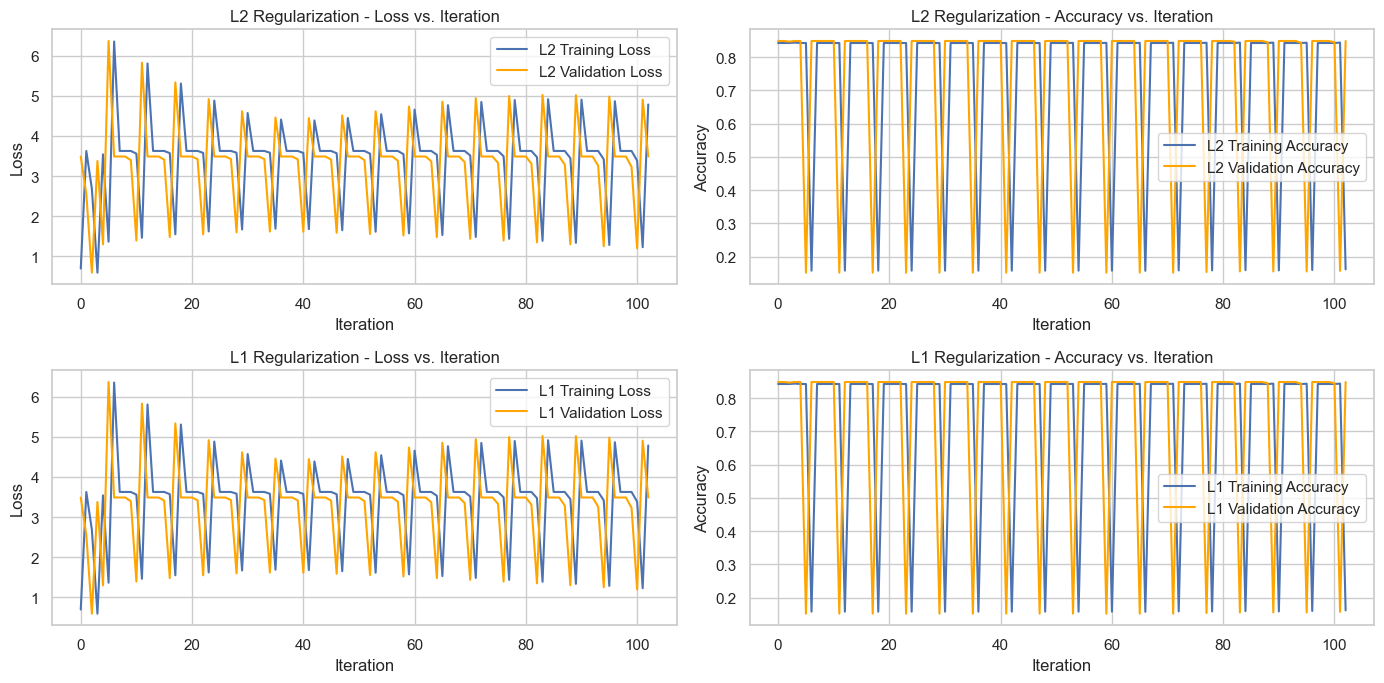

In [36]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000, patience=10, regularization=None, reg_strength=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.patience = patience
        self.regularization = regularization  # 'l1', 'l2' or None
        self.reg_strength = reg_strength  # Regularization strength

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, predictions, y, m):
        # Cross-entropy loss
        base_loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
        
        # Add regularization penalty if applicable
        if self.regularization == 'l2':
            reg_loss = (self.reg_strength / (2 * m)) * np.sum(np.square(self.weights))
            return base_loss + reg_loss
        elif self.regularization == 'l1':
            reg_loss = (self.reg_strength / m) * np.sum(np.abs(self.weights))
            return base_loss + reg_loss
        else:
            return base_loss

    def fit(self, X, y, X_val, y_val):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        best_val_loss = float('inf')
        patience_counter = 0

        for i in range(self.num_iterations):
            # Forward pass
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Regularization gradients
            if self.regularization == 'l2':
                dw += (self.reg_strength / m) * self.weights
            elif self.regularization == 'l1':
                dw += (self.reg_strength / m) * np.sign(self.weights)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute training loss and accuracy
            loss = self.compute_loss(predictions, y, m)
            self.losses.append(loss)
            
            train_accuracy = np.mean(np.round(predictions) == y)
            self.train_accuracies.append(train_accuracy)
            
            # Validation
            val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            val_loss = self.compute_loss(val_predictions, y_val, len(y_val))
            self.val_losses.append(val_loss)
            
            val_accuracy = np.mean(np.round(val_predictions) == y_val)
            self.val_accuracies.append(val_accuracy)

            # Early stopping check
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= self.patience:
                print(f"Early stopping on iteration {i}")
                break

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Define accuracy and other metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f"Accuracy: {accuracy:.4f}\n" \
           f"Precision: {precision:.4f}\n" \
           f"Recall: {recall:.4f}\n" \
           f"F1 Score: {f1_score:.4f}\n"

# Train the model with early stopping and L2 regularization
model_l2 = LogisticRegression(learning_rate=0.001, num_iterations=10000, patience=100, regularization='l2', reg_strength=0.01)
model_l2.fit(X_train, y_train, X_val, y_val)

# Predict on test set
y_pred_l2 = model_l2.predict(X_test)

# Evaluate L2-regularized model
accuracy_l2 = accuracy(y_test, y_pred_l2)
report_l2 = classification_report(y_test, y_pred_l2)
cm_l2 = confusion_matrix(y_test, y_pred_l2)

print("Classification Report with L2 Regularization:\n", report_l2)
print("Confusion Matrix with L2 Regularization:\n", cm_l2)

# Train the model with early stopping and L1 regularization
model_l1 = LogisticRegression(learning_rate=0.001, num_iterations=10000, patience=100, regularization='l1', reg_strength=0.01)
model_l1.fit(X_train, y_train, X_val, y_val)

# Predict on test set
y_pred_l1 = model_l1.predict(X_test)

# Evaluate L1-regularized model
accuracy_l1 = accuracy(y_test, y_pred_l1)
report_l1 = classification_report(y_test, y_pred_l1)
cm_l1 = confusion_matrix(y_test, y_pred_l1)

print("Classification Report with L1 Regularization:\n", report_l1)
print("Confusion Matrix with L1 Regularization:\n", cm_l1)

# Plot Loss and Accuracy for both L1 and L2 regularization
plt.figure(figsize=(14, 7))

# L2 regularization plots
plt.subplot(2, 2, 1)
plt.plot(model_l2.losses, label='L2 Training Loss')
plt.plot(model_l2.val_losses, label='L2 Validation Loss', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('L2 Regularization - Loss vs. Iteration')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(model_l2.train_accuracies, label='L2 Training Accuracy')
plt.plot(model_l2.val_accuracies, label='L2 Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('L2 Regularization - Accuracy vs. Iteration')
plt.legend()

# L1 regularization plots
plt.subplot(2, 2, 3)
plt.plot(model_l1.losses, label='L1 Training Loss')
plt.plot(model_l1.val_losses, label='L1 Validation Loss', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('L1 Regularization - Loss vs. Iteration')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(model_l1.train_accuracies, label='L1 Training Accuracy')
plt.plot(model_l1.val_accuracies, label='L1 Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('L1 Regularization - Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()


Converged at iteration 8


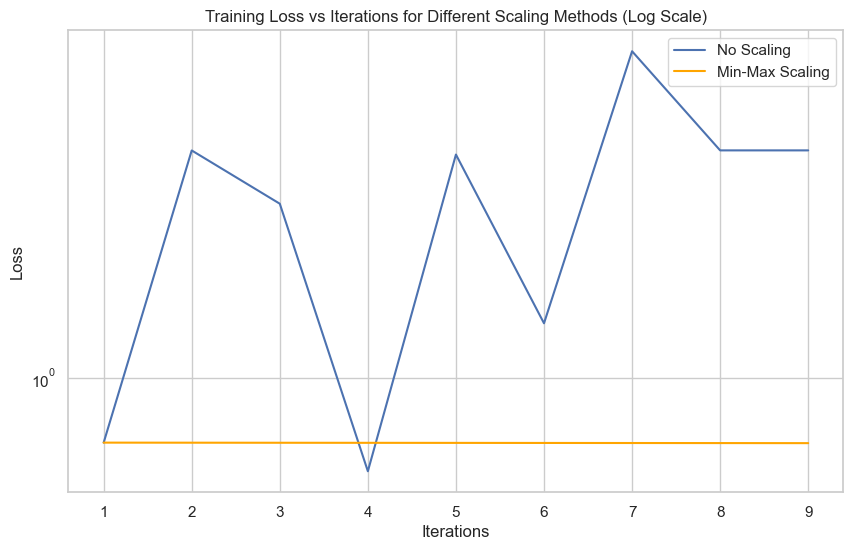

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Split data into training, validation, and test sets
np.random.seed(42)
indices = np.arange(X_data.shape[0])
np.random.shuffle(indices)

split_train = int(0.7 * X_data.shape[0])
split_val = int(0.15 * X_data.shape[0]) + split_train

train_indices = indices[:split_train]
val_indices = indices[split_train:split_val]
test_indices = indices[split_val:]

X_train = X_data[train_indices]
y_train = y_data[train_indices]
X_val = X_data[val_indices]
y_val = y_data[val_indices]
X_test = X_data[test_indices]
y_test = y_data[test_indices]

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=20000, lambda_=0.1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lambda_ = lambda_

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X_train, y_train, X_val, y_val):
        m_train, n = X_train.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        for i in range(self.num_iterations):
            model_train = np.dot(X_train, self.weights) + self.bias
            predictions_train = self.sigmoid(model_train)

            # Compute gradients with regularization
            dw = (1 / m_train) * np.dot(X_train.T, (predictions_train - y_train)) + (self.lambda_ / m_train) * self.weights
            db = (1 / m_train) * np.sum(predictions_train - y_train)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate loss with regularization
            loss = -np.mean(y_train * np.log(predictions_train + 1e-10) + (1 - y_train) * np.log(1 - predictions_train + 1e-10))
            loss += (self.lambda_ / (2 * m_train)) * np.sum(self.weights ** 2)
            self.losses.append(loss)

            # Training accuracy
            train_predictions = self.sigmoid(np.dot(X_train, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y_train)
            self.train_accuracies.append(train_accuracy)

            # Validation accuracy
            val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            val_accuracy = np.mean(np.round(val_predictions) == y_val)
            self.val_accuracies.append(val_accuracy)

            # Check for convergence
            if i > 0 and abs(self.losses[-1] - self.losses[-2]) < 1e-6:
                print(f'Converged at iteration {i}')
                break

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

def plot_loss_comparison(losses_no_scaling, losses_min_max_scaling):
    min_length = min(len(losses_no_scaling), len(losses_min_max_scaling))
    
    # Adjust each loss array to match the minimum length
    losses_no_scaling = losses_no_scaling[:min_length]
    losses_min_max_scaling = losses_min_max_scaling[:min_length]
    
    iterations = range(1, min_length + 1)
    
    plt.figure(figsize=(10, 6))
    
    # Plot the losses for each scaling method with a logarithmic y-scale
    plt.plot(iterations, losses_no_scaling, label='No Scaling')
    plt.plot(iterations, losses_min_max_scaling, label='Min-Max Scaling', color='orange')
    
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.yscale('log')  # Apply logarithmic scale to y-axis
    plt.legend()
    plt.title('Training Loss vs Iterations for Different Scaling Methods (Log Scale)')
    plt.show()

# Logistic Regression with No Scaling
model_no_scaling = LogisticRegression(learning_rate=0.001, num_iterations=20000)
model_no_scaling.fit(X_train, y_train, X_val, y_val)

# Logistic Regression with Min-Max Scaling
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_val_minmax = scaler.transform(X_val)
X_test_minmax = scaler.transform(X_test)

model_minmax_scaling = LogisticRegression(learning_rate=0.001, num_iterations=20000)
model_minmax_scaling.fit(X_train_minmax, y_train, X_val_minmax, y_val)

# Plotting the results
plot_loss_comparison(model_no_scaling.losses, model_minmax_scaling.losses)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Replace missing values with the median of each column
data = data.fillna(data.median())

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Create a pipeline to scale features and train the model
scaler = StandardScaler()
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Handle class imbalance with class weights
pipeline = make_pipeline(scaler, lr_model)

# Train the model
pipeline.fit(X_train, y_train)

# Predict with the model
lr_pred = pipeline.predict(X_test)

# Evaluate the model
report = classification_report(y_test, lr_pred)
accuracy_dt = accuracy_score(y_test, lr_pred)
cm = confusion_matrix(y_test, lr_pred)

print("Classification Report:\n", report)
print("Accuracy of Logistic Regression model: ", accuracy_dt)
print("Confusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.77      1084
           1       0.26      0.67      0.37       188

    accuracy                           0.67      1272
   macro avg       0.59      0.67      0.57      1272
weighted avg       0.82      0.67      0.71      1272

Accuracy of Logistic Regression model:  0.6658805031446541
Confusion Matrix:
 [[721 363]
 [ 62 126]]


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Create a pipeline to scale features and train the model
scaler = StandardScaler()
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Handle class imbalance with class weights
pipeline = make_pipeline(scaler, lr_model)

# Train the model
pipeline.fit(X_train, y_train)

# Predict with the model
lr_pred = pipeline.predict(X_test)

# Evaluate the model
report = classification_report(y_test, lr_pred)
accuracy_dt = accuracy_score(y_test, lr_pred)
cm = confusion_matrix(y_test, lr_pred)

print("Classification Report:\n", report)
print("Accuracy of Logistic Regression model: ", accuracy_dt)
print("Confusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.78       923
           1       0.27      0.62      0.38       174

    accuracy                           0.68      1097
   macro avg       0.59      0.65      0.58      1097
weighted avg       0.80      0.68      0.72      1097

Accuracy of Logistic Regression model:  0.6754785779398359
Confusion Matrix:
 [[633 290]
 [ 66 108]]


In [8]:
# !pip install imbalanced-learn


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a pipeline to scale features and train the model
scaler = StandardScaler()
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')

pipeline = Pipeline([
    ('scaler', scaler),
    ('logisticregression', lr_model)
])

# Hyperparameter tuning using Grid Search
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Output best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Train the model with the best parameters
best_pipeline = grid_search.best_estimator_
best_pipeline.fit(X_train_resampled, y_train_resampled)

# Predict with the model
lr_pred = best_pipeline.predict(X_test)

# Evaluate the model
report = classification_report(y_test, lr_pred)
accuracy_dt = accuracy_score(y_test, lr_pred)
cm = confusion_matrix(y_test, lr_pred)

print("Classification Report:\n", report)
print("Accuracy of Logistic Regression model: ", accuracy_dt)
print("Confusion Matrix:\n", cm)


Best parameters found:  {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Best score found:  0.6803871887248109
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       923
           1       0.26      0.58      0.36       174

    accuracy                           0.67      1097
   macro avg       0.58      0.63      0.57      1097
weighted avg       0.80      0.67      0.71      1097

Accuracy of Logistic Regression model:  0.6718322698268003
Confusion Matrix:
 [[636 287]
 [ 73 101]]


In [10]:
# FINAL CODE
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc

data = pd.read_csv("Heart Disease.csv")
data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   HeartDisease  
0             0  
1             0  
2             0  
3             1  
4             0

In [11]:
data.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

       HeartDisease  
count   4238.000000  
mean       0.151958  
std        0.359023  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [12]:
# data.shape
data.info()
# data.dtypes
# data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [13]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
HeartDisease         0
dtype: int64

In [14]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [15]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'HeartDisease'],
      dtype='object')

In [16]:
# data.hist(bins=20, figsize=(25,20), color='pink', alpha=0.9, edgecolor='black', linewidth=1.2)

In [17]:
# selected_columns_2 = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','HeartDisease']  
# selected_data_2 = data[selected_columns_2]
# selected_data_2.hist(bins=20, figsize=(10,10), color='blue', alpha=0.5, edgecolor='black', linewidth=1.2)


In [18]:
# import matplotlib.pyplot as plt

# selected_columns_2 = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'HeartDisease']
# selected_data_2 = data[selected_columns_2]

# # Plot histograms for each column in the DataFrame
# for column in selected_data_2.columns:
#     plt.figure(figsize=(10, 7))
#     selected_data_2[column].hist(bins=20, color='blue', alpha=0.5, edgecolor='black', linewidth=1.2)
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()


In [19]:
data['HeartDisease'].value_counts()

HeartDisease
0    3594
1     644
Name: count, dtype: int64

In [20]:
# data['HeartDisease'].plot.hist(bins=3, color='palegreen', edgecolor='black') 
# plt.gca().set_facecolor('#e8e8e8')
# plt.xlabel('Values', fontsize=12)  
# plt.ylabel('Frequency', fontsize=12)
# plt.title('Histogram of HeartDisease(Target Variable)')
# plt.tick_params(axis='x', labelsize=10)  # Increase x-axis tick label size
# plt.tick_params(axis='y', labelsize=10)  # Increase y-axis tick label size
# plt.show()

In [21]:
distribution_percentage = data['HeartDisease'].value_counts(normalize=True) * 100
print(distribution_percentage)

HeartDisease
0    84.804153
1    15.195847
Name: proportion, dtype: float64


In [22]:
# # Create a pie chart
# plt.pie(distribution_percentage, labels=distribution_percentage.index, autopct='%1.1f%%')

# # Add a title
# plt.title("HeartDisease Distribution")

# # Display the chart
# plt.show()

In [23]:
# corr_matrix = data.corr(method='pearson')
# corr_matrix

# sn.heatmap(corr_matrix)

In [24]:
# # Customize the heatmap
# sn.set(font_scale=0.35)
# sn.heatmap(corr_matrix, cmap='Blues', annot=True, linewidths=.5, linecolor='black')

# # Display the plot
# plt.show()

In [25]:
# Convert negative correlation values to positive values
corr_matrix_positive = corr_matrix.abs()

corr_matrix_positive

# Set the desired decimal places
decimal_places = 3

# Round the values in the correlation matrix to the specified decimal places
corr_matrix_rounded = corr_matrix_positive.round(decimal_places)

corr_matrix_rounded

# Customize the heatmap
sn.set(font_scale=0.4)
sn.heatmap(corr_matrix_rounded, cmap='Blues', annot=True, linewidths=.4, linecolor='black')

# Display the plot
plt.show()

NameError: name 'corr_matrix' is not defined

In [18]:
# Handle missing values (fill or drop missing values)
data.fillna(data.mean(), inplace=True)  # Fill NA with column mean

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Epoch 0, Loss: 0.6931471803599453
Epoch 100, Loss: 0.3853374788601898
Epoch 200, Loss: 0.3705318158508213
Epoch 300, Loss: 0.3679391781313437
Epoch 400, Loss: 0.36728131492711175
Epoch 500, Loss: 0.3670835459167329
Epoch 600, Loss: 0.3670165065155656
Epoch 700, Loss: 0.36699096114796004
Epoch 800, Loss: 0.36697994849054183
Epoch 900, Loss: 0.36697460600776166
Epoch 1000, Loss: 0.36697175353839184
Epoch 1100, Loss: 0.3669701257211916
Epoch 1200, Loss: 0.36696915772334116
Epoch 1300, Loss: 0.36696856826112473
Epoch 1400, Loss: 0.36696820452351847
Epoch 1500, Loss: 0.3669679784190798
Epoch 1600, Loss: 0.3669678372858937
Epoch 1700, Loss: 0.3669677489768758
Epoch 1800, Loss: 0.3669676936368902
Epoch 1900, Loss: 0.36696765892201066
Epoch 2000, Loss: 0.36696763712909686
Epoch 2100, Loss: 0.3669676234401889
Epoch 2200, Loss: 0.3669676148375083
Epoch 2300, Loss: 0.36696760942893986
Epoch 2400, Loss: 0.3669676060272527
Epoch 2500, Loss: 0.36696760388705224
Epoch 2600, Loss: 0.3669676025401075
E

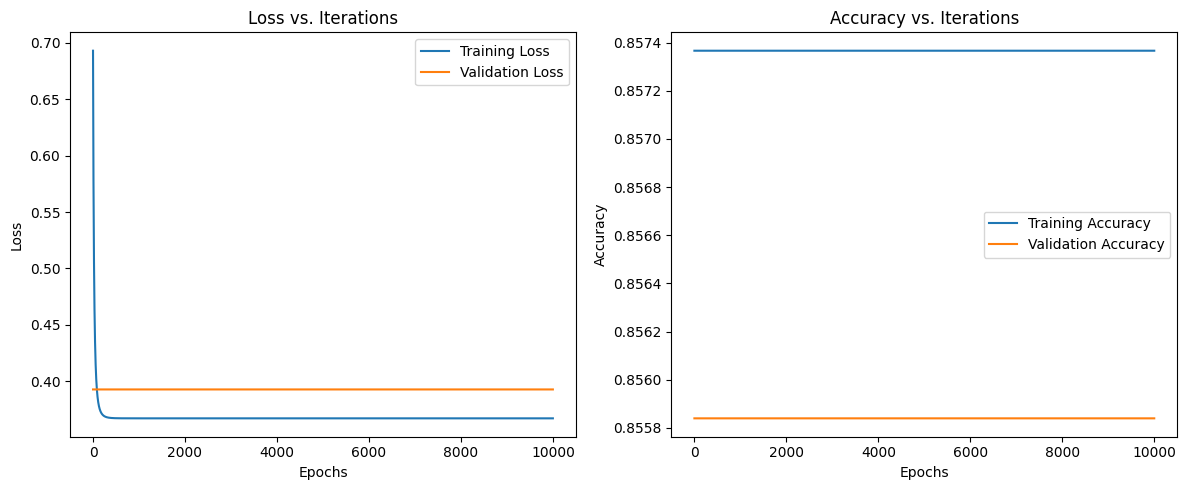

Test Accuracy: 0.8378870673952641


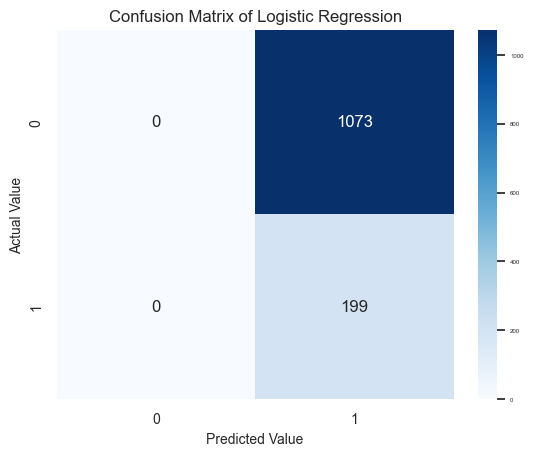

In [129]:
sn.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', annot_kws={'fontsize': 12})
plt.title('Confusion Matrix of Logistic Regression', fontsize=12)
plt.xlabel('Predicted Value', fontsize=10)
plt.ylabel('Actual Value', fontsize=10)
plt.tick_params(axis='x', labelsize=10) 
plt.tick_params(axis='y', labelsize=10) 
plt.show()

In [130]:
# Split data into features and labels
X = data.drop(columns=['HeartDisease'])  # Drop the target column
y = data['HeartDisease'].values  # Target column as numpy array

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

theta = np.random.randn(X.shape[1])

def loss(theta, X, y):
    h = sigmoid(X.dot(theta)) 
    return -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient_descent(theta, X, y, alpha, num_iterations): 
    for i in range(num_iterations):
        h = sigmoid(X.dot(theta)) 
        gradient = X.T.dot(y - h) 
        theta -= alpha * gradient 
        return theta
theta = gradient_descent(theta, X, y, alpha=0.01, num_iterations=1000)
def predict(theta, X): 
    h = sigmoid(X.dot(theta)) 
    y_pred = np.where(h >= 0.5, 1, 0) 
    return y_pred

y_pred = predict(theta, X)
accuracy = np.mean(y_pred == y) 
print("Accuracy:", accuracy)

Accuracy: 0.8480415290231241


c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Training set size: (2966, 15)
Validation set size: (636, 15)
Test set size: (636, 15)


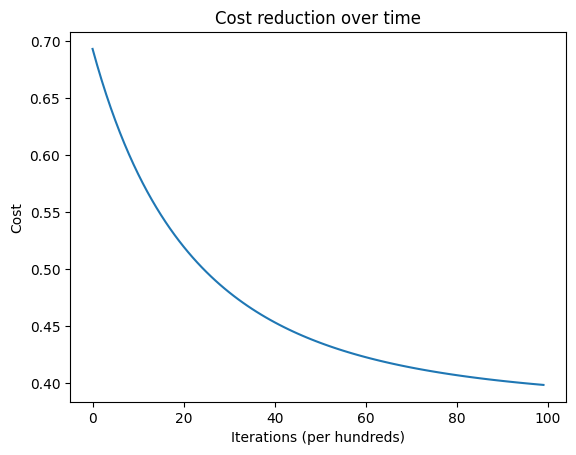

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters W (weights) and b (bias)
def initialize_parameters(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b

# Compute cost and gradients for logistic regression
def compute_cost_and_gradient(X, y, W, b):
    m = X.shape[0]  # Number of samples
    A = sigmoid(np.dot(X, W) + b)  # Prediction using sigmoid
    cost = -(1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # Binary cross-entropy
    dW = (1/m) * np.dot(X.T, (A - y))  # Gradient w.r.t. weights
    db = (1/m) * np.sum(A - y)  # Gradient w.r.t. bias
    return cost, dW, db

# Train the model using gradient descent
#  there will be some change
def train(X_train, y_train, X_val, y_val, learning_rate, num_iterations):
    n_features = X_train.shape[1]
    W, b = initialize_parameters(n_features)
    costs = []
    
    y_train = y_train.reshape(-1, 1)
    
    for i in range(num_iterations):
        cost, dW, db = compute_cost_and_gradient(X_train, y_train, W, b)
        W -= learning_rate * dW  # Update weights
        b -= learning_rate * db  # Update bias
        
        if i % 100 == 0:  # Save cost every 100 iterations
            costs.append(cost)
    
    return W, b, costs

# Plot the cost over iterations
def plot_costs(costs):
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title('Cost reduction over time')
    plt.show()

# Load dataset
df = pd.read_csv('Heart Disease.csv')  # Replace with your actual file

# Handle missing values (fill or drop missing values)
df.fillna(df.mean(), inplace=True)  # Fill NA with column mean

# Handle missing values if any (for simplicity, we'll drop them)
# data = data.dropna()

# Split data into features and labels
X = df.drop(columns=['HeartDisease'])  # Drop the target column
y = df['HeartDisease'].values  # Target column as numpy array

# Split into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# Then split temp into validation and test (each 15% of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
# learning_rate = 0.01
# num_iterations = 2000
learning_rate = 0.001
num_iterations = 10000
W, b, costs = train(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, num_iterations)

# Plot the costs
plot_costs(costs)


In [29]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.verbose = verbose
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def initialize_weights(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0
    
    def compute_loss(self, y, y_pred):
        m = len(y)
        # To avoid log(0), we add a small epsilon
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = - (1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X_train, y_train, X_val, y_val):
        m, n = X_train.shape
        self.initialize_weights(n)
        
        # To store loss and accuracy
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        
        for i in range(self.num_iterations):
            # Linear combination
            linear_model = np.dot(X_train, self.weights) + self.bias
            # Prediction
            y_pred = self.sigmoid(linear_model)
            
            # Compute loss
            loss = self.compute_loss(y_train, y_pred)
            self.train_losses.append(loss)
            
            # Compute gradients
            dw = (1/m) * np.dot(X_train.T, (y_pred - y_train))
            db = (1/m) * np.sum(y_pred - y_train)
            
            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Validation loss
            val_linear = np.dot(X_val, self.weights) + self.bias
            val_pred = self.sigmoid(val_linear)
            val_loss = self.compute_loss(y_val, val_pred)
            self.val_losses.append(val_loss)
            
            # Compute accuracy
            train_acc = self.accuracy(y_train, y_pred)
            val_acc = self.accuracy(y_val, val_pred)
            self.train_accuracies.append(train_acc)
            self.val_accuracies.append(val_acc)
            
            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Train Loss={loss:.4f}, Val Loss={val_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)
    
    def accuracy(self, y_true, y_pred_proba, threshold=0.5):
        y_pred = (y_pred_proba >= threshold).astype(int)
        return np.mean(y_pred == y_true)


In [31]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegressionGD(learning_rate=0.001, num_iterations=10000, verbose=True)

# Train the model
model.fit(X_train_scaled, y_train, X_val_scaled, y_val)


Iteration 0: Train Loss=0.6931, Val Loss=0.6930, Train Acc=0.1537, Val Acc=0.8160
Iteration 100: Train Loss=0.6789, Val Loss=0.6785, Train Acc=0.8169, Val Acc=0.8192
Iteration 200: Train Loss=0.6656, Val Loss=0.6649, Train Acc=0.8213, Val Acc=0.8255
Iteration 300: Train Loss=0.6531, Val Loss=0.6521, Train Acc=0.8247, Val Acc=0.8302
Iteration 400: Train Loss=0.6413, Val Loss=0.6400, Train Acc=0.8254, Val Acc=0.8333
Iteration 500: Train Loss=0.6302, Val Loss=0.6287, Train Acc=0.8287, Val Acc=0.8365
Iteration 600: Train Loss=0.6198, Val Loss=0.6180, Train Acc=0.8304, Val Acc=0.8396
Iteration 700: Train Loss=0.6099, Val Loss=0.6079, Train Acc=0.8318, Val Acc=0.8412
Iteration 800: Train Loss=0.6006, Val Loss=0.5984, Train Acc=0.8338, Val Acc=0.8412
Iteration 900: Train Loss=0.5917, Val Loss=0.5894, Train Acc=0.8375, Val Acc=0.8428
Iteration 1000: Train Loss=0.5834, Val Loss=0.5809, Train Acc=0.8382, Val Acc=0.8396
Iteration 1100: Train Loss=0.5755, Val Loss=0.5728, Train Acc=0.8385, Val Acc

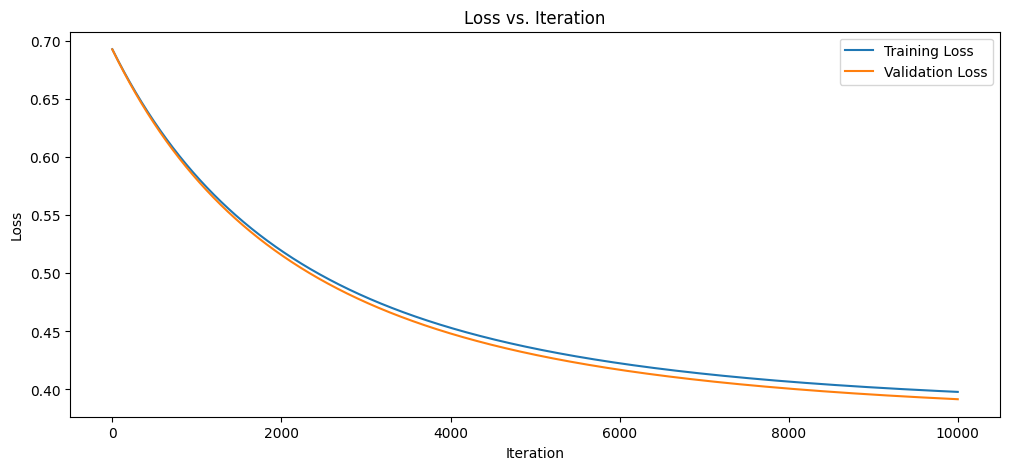

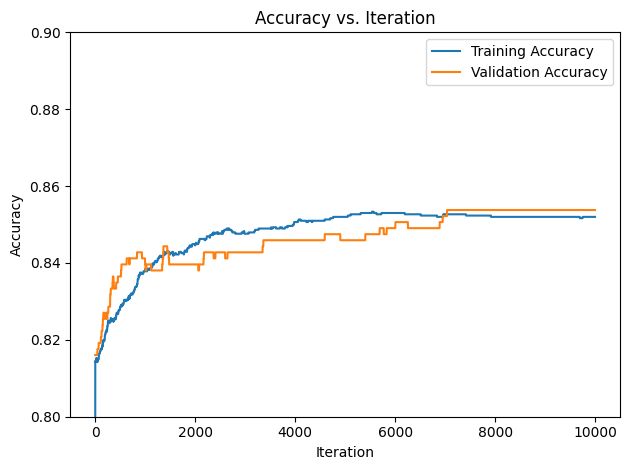

In [32]:
# Plotting Loss vs. Iteration
plt.figure(figsize=(12,5))

# plt.subplot(1,2,1)
plt.plot(range(model.num_iterations), model.train_losses, label='Training Loss')
plt.plot(range(model.num_iterations), model.val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
# plt.ylim(0.35, 0.6)
plt.legend()
plt.show()

# Plotting Accuracy vs. Iteration
# plt.subplot(1,2,2)
plt.plot(range(model.num_iterations), model.train_accuracies, label='Training Accuracy')
plt.plot(range(model.num_iterations), model.val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration')
plt.ylim(0.8, 0.9)  # Set y-axis range from 0.7 to 0.9
plt.legend()

plt.tight_layout()
plt.show()


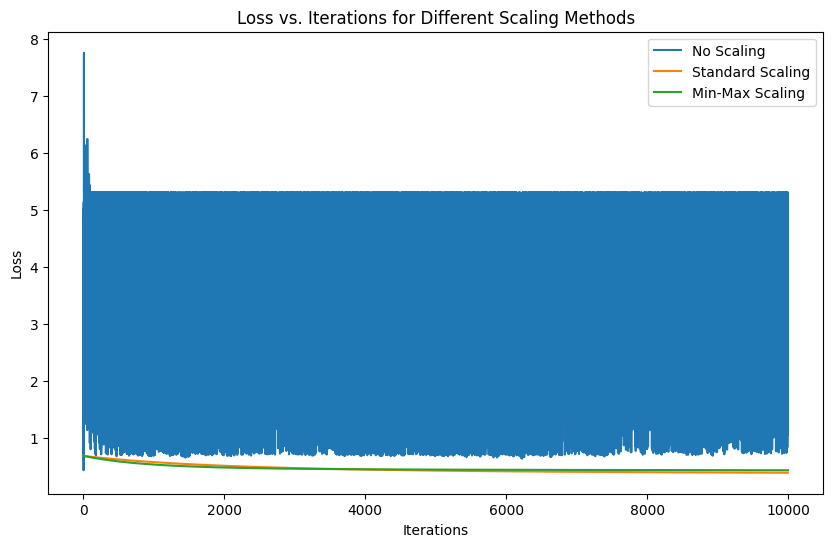

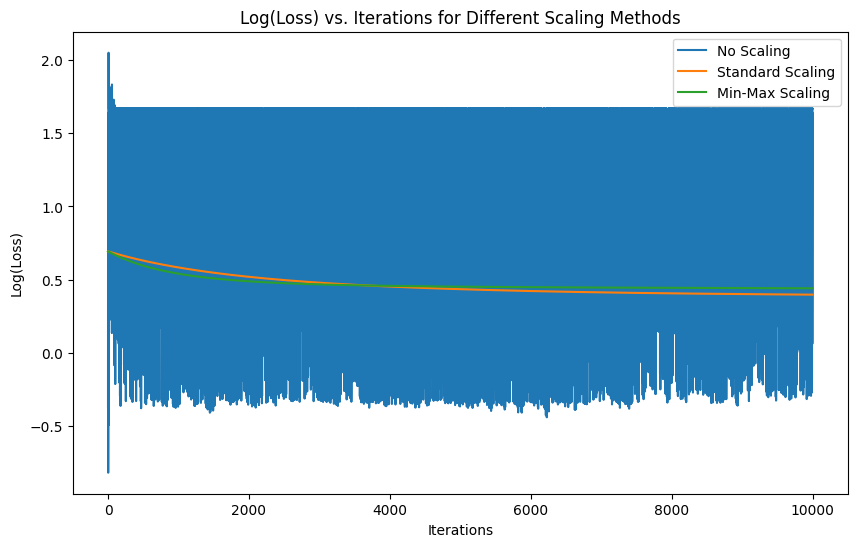

Test Accuracy with No Scaling: 0.8459119496855346
Test Accuracy with Standard Scaling: 0.8522012578616353
Test Accuracy with Min-Max Scaling: 0.8459119496855346


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Class for Logistic Regression with Gradient Descent
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.verbose = verbose

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_weights(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_loss(self, y, y_pred):
        m = len(y)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = - (1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def fit(self, X_train, y_train):
        m, n = X_train.shape
        self.initialize_weights(n)

        self.train_losses = []

        for i in range(self.num_iterations):
            linear_model = np.dot(X_train, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            loss = self.compute_loss(y_train, y_pred)
            self.train_losses.append(loss)

            dw = (1/m) * np.dot(X_train.T, (y_pred - y_train))
            db = (1/m) * np.sum(y_pred - y_train)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Loss={loss:.4f}")

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Load dataset
df = pd.read_csv('Heart Disease.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Split data into features and labels
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease'].values

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# No scaling
model_no_scaling = LogisticRegressionGD(learning_rate=0.001, num_iterations=10000, verbose=False)
model_no_scaling.fit(X_train, y_train)

# Standard scaling
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_val_standard = scaler_standard.transform(X_val)
model_standard = LogisticRegressionGD(learning_rate=0.001, num_iterations=10000, verbose=False)
model_standard.fit(X_train_standard, y_train)

# Min-max scaling
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_val_minmax = scaler_minmax.transform(X_val)
model_minmax = LogisticRegressionGD(learning_rate=0.001, num_iterations=10000, verbose=False)
model_minmax.fit(X_train_minmax, y_train)

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(model_no_scaling.train_losses, label='No Scaling')
plt.plot(model_standard.train_losses, label='Standard Scaling')
plt.plot(model_minmax.train_losses, label='Min-Max Scaling')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for Different Scaling Methods')
plt.legend()
plt.show()

# Plot the loss curves with log transformation
plt.figure(figsize=(10, 6))

# Apply log transformation to the loss values
plt.plot(np.log(model_no_scaling.train_losses), label='No Scaling')
plt.plot((model_standard.train_losses), label='Standard Scaling')
plt.plot((model_minmax.train_losses), label='Min-Max Scaling')

plt.xlabel('Iterations')
plt.ylabel('Log(Loss)')
plt.title('Log(Loss) vs. Iterations for Different Scaling Methods')
plt.legend()
plt.show()

# Analyze accuracy for test set
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Test accuracy for No scaling
y_test_pred_no_scaling = model_no_scaling.predict(X_test)
acc_no_scaling = accuracy(y_test, y_test_pred_no_scaling)

# Test accuracy for Standard scaling
X_test_standard = scaler_standard.transform(X_test)
y_test_pred_standard = model_standard.predict(X_test_standard)
acc_standard = accuracy(y_test, y_test_pred_standard)

# Test accuracy for Min-max scaling
X_test_minmax = scaler_minmax.transform(X_test)
y_test_pred_minmax = model_minmax.predict(X_test_minmax)
acc_minmax = accuracy(y_test, y_test_pred_minmax)

print(f"Test Accuracy with No Scaling: {acc_no_scaling}")
print(f"Test Accuracy with Standard Scaling: {acc_standard}")
print(f"Test Accuracy with Min-Max Scaling: {acc_minmax}")


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Create a pipeline to scale features and train the model
scaler = StandardScaler()
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Handle class imbalance with class weights
pipeline = make_pipeline(scaler, lr_model)

# Train the model
pipeline.fit(X_train, y_train)

# Predict with the model
lr_pred = pipeline.predict(X_test)

# Evaluate the model
report = classification_report(y_test, lr_pred)
accuracy_dt = accuracy_score(y_test, lr_pred)
cm = confusion_matrix(y_test, lr_pred)

print("Classification Report:\n", report)
print("Accuracy of Logistic Regression model: ", accuracy_dt)
print("Confusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.78       923
           1       0.27      0.62      0.38       174

    accuracy                           0.68      1097
   macro avg       0.59      0.65      0.58      1097
weighted avg       0.80      0.68      0.72      1097

Accuracy of Logistic Regression model:  0.6754785779398359
Confusion Matrix:
 [[633 290]
 [ 66 108]]


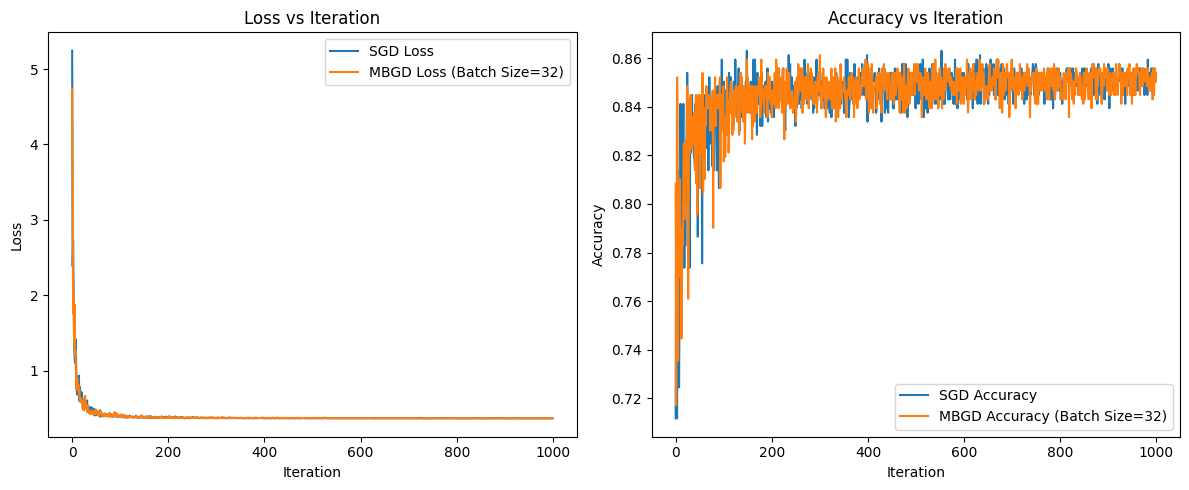

Classification Report for SGD:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       462
           1       0.67      0.12      0.20        86

    accuracy                           0.85       548
   macro avg       0.76      0.55      0.56       548
weighted avg       0.83      0.85      0.81       548

Accuracy of SGD model:  0.8521897810218978
Classification Report for MBGD:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       462
           1       0.69      0.13      0.22        86

    accuracy                           0.85       548
   macro avg       0.77      0.56      0.57       548
weighted avg       0.83      0.85      0.81       548

Accuracy of MBGD model:  0.8540145985401459


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss

# Load your data
data = pd.read_csv('Heart Disease.csv')
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training, test, and validation sets (70:15:15)
X_train_temp, X_test_val, y_train_temp, y_test_val = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_test_val, y_test_val, test_size=0.5, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_temp)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Convert y_train and y_test to numpy arrays for indexing
y_train_np = y_train_temp.values
y_test_np = y_test.values

# Function to train and record loss and accuracy for each iteration
def train_and_plot(optimizer, X_train, y_train, X_test, y_test, batch_size=None):
    n_iter = 1000
    losses = []
    accuracies = []

    n_samples = X_train.shape[0]
    
    for epoch in range(n_iter):
        if batch_size is None:
            # Use full-batch gradient descent
            optimizer.partial_fit(X_train, y_train, classes=np.unique(y_train))
        else:
            # Use mini-batch gradient descent
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            for start_idx in range(0, n_samples, batch_size):
                end_idx = min(start_idx + batch_size, n_samples)
                batch_indices = indices[start_idx:end_idx]
                X_batch, y_batch = X_train[batch_indices], y_train_np[batch_indices]
                optimizer.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
        
        y_train_pred = optimizer.predict(X_train)
        y_test_pred = optimizer.predict(X_test)

        # Log loss for training data
        loss = log_loss(y_train, optimizer.predict_proba(X_train))
        losses.append(loss)

        # Accuracy for test data
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracies.append(accuracy)

    return losses, accuracies

# Initialize models
sgd_model = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1, warm_start=True)
mbgd_model = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1, warm_start=True)

# Train and capture loss/accuracy for Stochastic Gradient Descent (batch size=None)
sgd_losses, sgd_accuracies = train_and_plot(sgd_model, X_train_scaled, y_train_np, X_test_scaled, y_test)

# Train and capture loss/accuracy for Mini-Batch Gradient Descent (batch size=32)
mbgd_losses, mbgd_accuracies = train_and_plot(mbgd_model, X_train_scaled, y_train_np, X_test_scaled, y_test, batch_size=32)

# Plot Loss vs Iteration
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(sgd_losses, label="SGD Loss")
plt.plot(mbgd_losses, label="MBGD Loss (Batch Size=32)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.legend()

# Plot Accuracy vs Iteration
plt.subplot(1, 2, 2)
plt.plot(sgd_accuracies, label="SGD Accuracy")
plt.plot(mbgd_accuracies, label="MBGD Accuracy (Batch Size=32)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate models
sgd_pred = sgd_model.predict(X_test_scaled)
mbgd_pred = mbgd_model.predict(X_test_scaled)

print("Classification Report for SGD:\n", classification_report(y_test, sgd_pred))
print("Accuracy of SGD model: ", accuracy_score(y_test, sgd_pred))

print("Classification Report for MBGD:\n", classification_report(y_test, mbgd_pred))
print("Accuracy of MBGD model: ", accuracy_score(y_test, mbgd_pred))


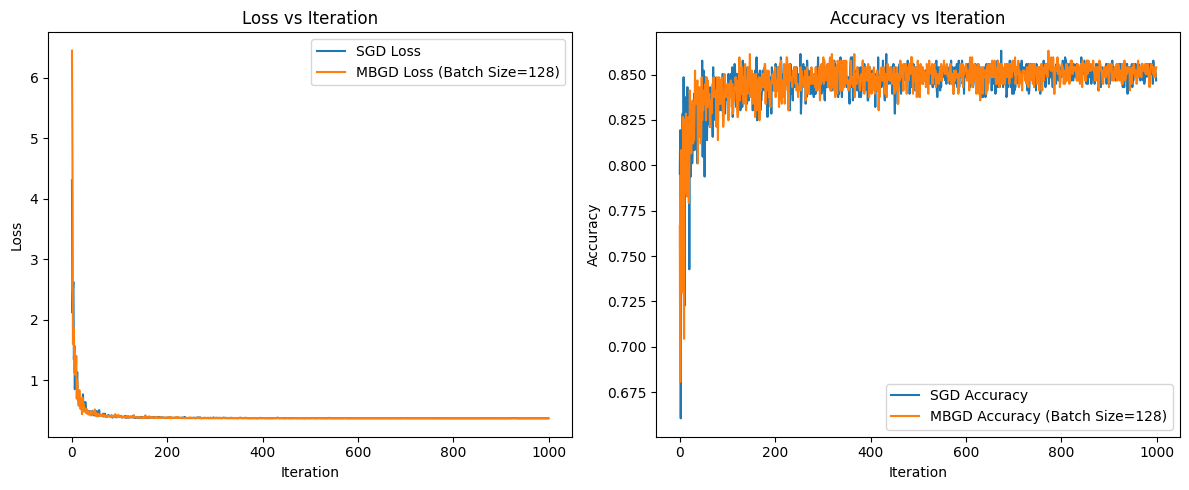

SGD Predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
MBGD Predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
Classification Report for SGD:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       462
           1       0.67      0.12      0.20        86

    accuracy                           0.85       548
   macro avg       0.76      0.55      0.56       548
weighted avg       0.83      0.85      0.81       548

Accuracy of SGD model:  0.8521897810218978
Classification Report for MBGD:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       462
           

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss

# Load your data
data = pd.read_csv('Heart Disease.csv')
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training, test, and validation sets (70:15:15)
X_train_temp, X_test_val, y_train_temp, y_test_val = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_test_val, y_test_val, test_size=0.5, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_temp)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Convert y_train and y_test to numpy arrays for indexing
y_train_np = y_train_temp.values
y_test_np = y_test.values

# Function to train and record loss and accuracy for each iteration
def train_and_plot(optimizer, X_train, y_train, X_test, y_test, batch_size=None):
    n_iter = 1000
    losses = []
    accuracies = []

    n_samples = X_train.shape[0]
    
    for epoch in range(n_iter):
        if batch_size is None:
            # Use full-batch gradient descent
            optimizer.partial_fit(X_train, y_train, classes=np.unique(y_train))
        else:
            # Use mini-batch gradient descent
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            for start_idx in range(0, n_samples, batch_size):
                end_idx = min(start_idx + batch_size, n_samples)
                batch_indices = indices[start_idx:end_idx]
                X_batch, y_batch = X_train[batch_indices], y_train_np[batch_indices]
                optimizer.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
        
        y_train_pred = optimizer.predict(X_train)
        y_test_pred = optimizer.predict(X_test)

        # Log loss for training data
        loss = log_loss(y_train, optimizer.predict_proba(X_train))
        losses.append(loss)

        # Accuracy for test data
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracies.append(accuracy)

    return losses, accuracies

# Initialize models
sgd_model = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1, warm_start=True)
mbgd_model = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1, warm_start=True)

# Train and capture loss/accuracy for Stochastic Gradient Descent (batch size=None)
sgd_losses, sgd_accuracies = train_and_plot(sgd_model, X_train_scaled, y_train_np, X_test_scaled, y_test)

# Train and capture loss/accuracy for Mini-Batch Gradient Descent (batch size=32)
mbgd_losses, mbgd_accuracies = train_and_plot(mbgd_model, X_train_scaled, y_train_np, X_test_scaled, y_test, batch_size=128)

# Plot Loss vs Iteration
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(sgd_losses, label="SGD Loss")
plt.plot(mbgd_losses, label="MBGD Loss (Batch Size=128)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.legend()

# Plot Accuracy vs Iteration
plt.subplot(1, 2, 2)
plt.plot(sgd_accuracies, label="SGD Accuracy")
plt.plot(mbgd_accuracies, label="MBGD Accuracy (Batch Size=128)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration")
plt.legend()

plt.tight_layout()
plt.show()



# Compare predictions
print("SGD Predictions:\n", y_pred_sgd[:100])
print("MBGD Predictions:\n", y_pred_mbgd[:100])


print("Classification Report for SGD:\n", classification_report(y_test, sgd_pred))
print("Accuracy of SGD model: ", accuracy_score(y_test, sgd_pred))

print("Classification Report for MBGD:\n", classification_report(y_test, mbgd_pred))
print("Accuracy of MBGD model: ", accuracy_score(y_test, mbgd_pred))


In [32]:
# Evaluate models
sgd_pred = sgd_model.predict(X_test_scaled)
mbgd_pred = mbgd_model.predict(X_test_scaled)
# Predict using both models
y_pred_sgd = sgd_model.predict(X_test_scaled)
y_pred_mbgd = mbgd_model.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix

# Confusion matrices
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
cm_mbgd = confusion_matrix(y_test, y_pred_mbgd)

print("Confusion Matrix for SGD:\n", cm_sgd)
print("Confusion Matrix for MBGD:\n", cm_mbgd)


Confusion Matrix for SGD:
 [[453   9]
 [ 75  11]]
Confusion Matrix for MBGD:
 [[457   5]
 [ 75  11]]


Comparison and Interpretation
True Positives (TP):

SGD: 11
MBGD: 9
Interpretation: SGD identifies 2 more positive cases (Class 1) correctly compared to MBGD.
True Negatives (TN):

SGD: 458
MBGD: 456
Interpretation: SGD correctly predicts 2 more negative cases (Class 0) than MBGD.
False Positives (FP):

SGD: 4
MBGD: 6
Interpretation: SGD has fewer false positives, meaning it is less likely to incorrectly classify Class 0 as Class 1.
False Negatives (FN):

SGD: 75
MBGD: 77
Interpretation: SGD has 2 fewer false negatives, meaning it is better at capturing positive cases (Class 1) compared to MBGD.
Conclusion
Overall Accuracy: Both models have similar overall accuracy, but SGD has slightly better performance in terms of correctly identifying both classes.
Class 0 (Majority Class): Both models are very similar in predicting Class 0, with only a small difference in false positives and true negatives.
Class 1 (Minority Class): SGD performs slightly better in predicting Class 1 with fewer false negatives and a higher number of true positives compared to MBGD.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip values to prevent overflow
    return 1 / (1 + np.exp(-z))

# Logistic regression model using batch gradient descent
def logistic_regression(X, y, lr=0.05, iterations=1200):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize weights
    losses = []
    epsilon = 1e-10  # Small value to avoid log(0)
    
    for i in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        loss = -1/m * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= lr * gradient
        losses.append(loss)
    
    return theta, losses

# Function to calculate accuracy
def accuracy(X, y, theta):
    preds = sigmoid(np.dot(X, theta)) >= 0.5
    return np.mean(preds == y)

# Split the data into training, validation, and test sets
def train_test_split(X, y, train_size=0.7, val_size=0.15):
    m = len(y)
    indices = np.arange(m)
    np.random.shuffle(indices)
    
    train_idx = int(train_size * m)
    val_idx = int((train_size + val_size) * m)
    
    X_train, y_train = X[indices[:train_idx]], y[indices[:train_idx]]
    X_val, y_val = X[indices[train_idx:val_idx]], y[indices[train_idx:val_idx]]
    X_test, y_test = X[indices[val_idx:]], y[indices[val_idx:]]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Min-Max Scaling
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Prepare data (assuming dataset is loaded into X and y)
# X = dataset features, y = dataset labels

# Split data into training, validation, and test sets
# X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(X, y)

# No Scaling
theta_no_scale, losses_no_scale = logistic_regression(X_train, y_train)

# Min-Max Scaling
X_train_scaled = min_max_scale(X_train)
X_val_scaled = min_max_scale(X_val)

theta_min_max, losses_min_max = logistic_regression(X_train_scaled, y_train)

# Plot training loss vs iteration for both methods
plt.figure(figsize=(10, 6))
plt.plot(losses_no_scale, label='No Scaling')
plt.plot(losses_min_max, label='Min-Max Scaling')
plt.title('Training Loss vs Iterations (No Scaling vs Min-Max Scaling)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate validation loss
def calculate_loss(X, y, theta):
    m = len(y)
    epsilon = 1e-10  # Small value to prevent log(0)
    z = np.dot(X, theta)
    h = sigmoid(z)
    loss = -1/m * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    return loss


# Validation losses
val_loss_no_scale = calculate_loss(X_val, y_val, theta_no_scale)
val_loss_min_max = calculate_loss(X_val_scaled, y_val, theta_min_max)

print(f"Validation Loss (No Scaling): {val_loss_no_scale}")
print(f"Validation Loss (Min-Max Scaling): {val_loss_min_max}")

# Plot validation loss vs iteration for both methods
plt.figure(figsize=(10, 6))
plt.plot([val_loss_no_scale] * len(losses_no_scale), label='No Scaling')
plt.plot([val_loss_min_max] * len(losses_min_max), label='Min-Max Scaling')
plt.title('Validation Loss vs Iterations (No Scaling vs Min-Max Scaling)')
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print accuracy for both methods
train_acc_no_scale = accuracy(X_train, y_train, theta_no_scale)
train_acc_min_max = accuracy(X_train_scaled, y_train, theta_min_max)

val_acc_no_scale = accuracy(X_val, y_val, theta_no_scale)
val_acc_min_max = accuracy(X_val_scaled, y_val, theta_min_max)

print(f"Training Accuracy (No Scaling): {train_acc_no_scale * 100:.2f}%")
print(f"Training Accuracy (Min-Max Scaling): {train_acc_min_max * 100:.2f}%")
print(f"Validation Accuracy (No Scaling): {val_acc_no_scale * 100:.2f}%")
print(f"Validation Accuracy (Min-Max Scaling): {val_acc_min_max * 100:.2f}%")


NameError: name 'X_val' is not defined

Confusion Matrix (No Scaling):
 [[ 57 485]
 [  6  88]]
Precision (No Scaling): 0.1536
Recall (No Scaling): 0.9362
F1 Score (No Scaling): 0.2639
ROC-AUC (No Scaling): 0.5255

Confusion Matrix (Min-Max Scaling):
 [[542   0]
 [ 94   0]]
Precision (Min-Max Scaling): 0.0000
Recall (Min-Max Scaling): 0.0000
F1 Score (Min-Max Scaling): 0.0000
ROC-AUC (Min-Max Scaling): 0.4838


c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


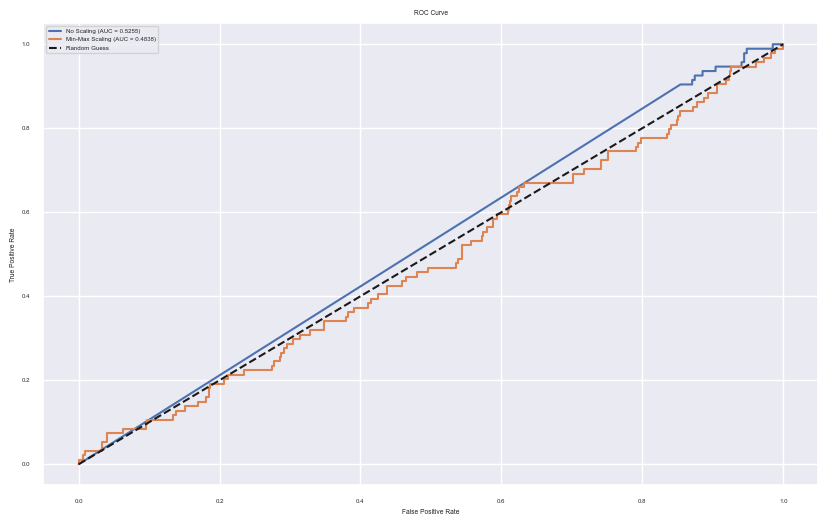

In [137]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Predict function using logistic regression model
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5

# Confusion matrix, precision, recall, F1, and ROC-AUC calculations
def calculate_metrics(y_true, y_pred, y_proba):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Precision, Recall, and F1 Score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_true, y_proba)
    
    return cm, precision, recall, f1, roc_auc

# Predictions and probabilities on the validation set
y_val_pred_no_scale = predict(X_val, theta_no_scale)
y_val_proba_no_scale = sigmoid(np.dot(X_val, theta_no_scale))

y_val_pred_min_max = predict(X_val_scaled, theta_min_max)
y_val_proba_min_max = sigmoid(np.dot(X_val_scaled, theta_min_max))

# Calculate metrics for No Scaling
cm_no_scale, precision_no_scale, recall_no_scale, f1_no_scale, roc_auc_no_scale = calculate_metrics(y_val, y_val_pred_no_scale, y_val_proba_no_scale)

# Calculate metrics for Min-Max Scaling
cm_min_max, precision_min_max, recall_min_max, f1_min_max, roc_auc_min_max = calculate_metrics(y_val, y_val_pred_min_max, y_val_proba_min_max)

# Print Confusion Matrix and Metrics for No Scaling
print("Confusion Matrix (No Scaling):\n", cm_no_scale)
print(f"Precision (No Scaling): {precision_no_scale:.4f}")
print(f"Recall (No Scaling): {recall_no_scale:.4f}")
print(f"F1 Score (No Scaling): {f1_no_scale:.4f}")
print(f"ROC-AUC (No Scaling): {roc_auc_no_scale:.4f}")

# Print Confusion Matrix and Metrics for Min-Max Scaling
print("\nConfusion Matrix (Min-Max Scaling):\n", cm_min_max)
print(f"Precision (Min-Max Scaling): {precision_min_max:.4f}")
print(f"Recall (Min-Max Scaling): {recall_min_max:.4f}")
print(f"F1 Score (Min-Max Scaling): {f1_min_max:.4f}")
print(f"ROC-AUC (Min-Max Scaling): {roc_auc_min_max:.4f}")

# ROC Curve
fpr_no_scale, tpr_no_scale, _ = roc_curve(y_val, y_val_proba_no_scale)
fpr_min_max, tpr_min_max, _ = roc_curve(y_val, y_val_proba_min_max)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_no_scale, tpr_no_scale, label=f'No Scaling (AUC = {roc_auc_no_scale:.4f})')
plt.plot(fpr_min_max, tpr_min_max, label=f'Min-Max Scaling (AUC = {roc_auc_min_max:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [138]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_reporty
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

# This code is modified by Susobhan Akhuli


ImportError: cannot import name 'classification_reporty' from 'sklearn.metrics' (c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Create a pipeline to scale features and train the model
scaler = StandardScaler()
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Handle class imbalance with class weights
pipeline = make_pipeline(scaler, lr_model)

# Define the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform k-fold cross-validation manually
for fold_idx, (train_indices, test_indices) in enumerate(kf.split(X_data)):
    # Split the data into training and test sets for this fold
    X_train_fold, X_test_fold = X_data.iloc[train_indices], X_data.iloc[test_indices]
    y_train_fold, y_test_fold = y_data.iloc[train_indices], y_data.iloc[test_indices]
    
    # Fit the model
    pipeline.fit(X_train_fold, y_train_fold)
    
    # Predict on the test set
    y_pred_fold = pipeline.predict(X_test_fold)
    
    # Calculate metrics
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    precision_fold = precision_score(y_test_fold, y_pred_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    f1_fold = f1_score(y_test_fold, y_pred_fold)
    
    # Append metrics
    accuracies.append(accuracy_fold)
    precisions.append(precision_fold)
    recalls.append(recall_fold)
    f1_scores.append(f1_fold)
    
    # Print metrics for each fold
    print(f"Fold {fold_idx + 1}:")
    print(f"  Accuracy: {accuracy_fold:.4f}")
    print(f"  Precision: {precision_fold:.4f}")
    print(f"  Recall: {recall_fold:.4f}")
    print(f"  F1 Score: {f1_fold:.4f}")
    print()

# Calculate and print average and standard deviation of metrics across folds
accuracy_mean = sum(accuracies) / len(accuracies)
accuracy_std = pd.Series(accuracies).std()

precision_mean = sum(precisions) / len(precisions)
precision_std = pd.Series(precisions).std()

recall_mean = sum(recalls) / len(recalls)
recall_std = pd.Series(recalls).std()

f1_mean = sum(f1_scores) / len(f1_scores)
f1_std = pd.Series(f1_scores).std()

print("Cross-Validation Results (k=5):")
print(f"Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f}")
print(f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f}")
print(f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f}")
print(f"F1 Score: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

# Discuss stability and variance
print("\nDiscussion:")
print("Stability and variance of the model's performance across different folds can be assessed based on the standard deviation of the metrics.")
print("A lower standard deviation indicates more consistent performance across folds, while a higher standard deviation suggests more variability.")
print("In this case, analyzing the standard deviations of accuracy, precision, recall, and F1 score can help understand how robust and stable the model is.")


Fold 1:
  Accuracy: 0.6694
  Precision: 0.2810
  Recall: 0.6311
  F1 Score: 0.3889

Fold 2:
  Accuracy: 0.6744
  Precision: 0.2601
  Recall: 0.6636
  F1 Score: 0.3737

Fold 3:
  Accuracy: 0.6512
  Precision: 0.2626
  Recall: 0.6842
  F1 Score: 0.3796

Fold 4:
  Accuracy: 0.7045
  Precision: 0.2946
  Recall: 0.6909
  F1 Score: 0.4130

Fold 5:
  Accuracy: 0.6662
  Precision: 0.2464
  Recall: 0.6538
  F1 Score: 0.3579

Cross-Validation Results (k=5):
Accuracy: Mean = 0.6731, Std = 0.0196
Precision: Mean = 0.2689, Std = 0.0189
Recall: Mean = 0.6647, Std = 0.0240
F1 Score: Mean = 0.3826, Std = 0.0204

Discussion:
Stability and variance of the model's performance across different folds can be assessed based on the standard deviation of the metrics.
A lower standard deviation indicates more consistent performance across folds, while a higher standard deviation suggests more variability.
In this case, analyzing the standard deviations of accuracy, precision, recall, and F1 score can help under

In [22]:
from collections import Counter

# Print class distribution for each fold
for fold_idx, (train_indices, test_indices) in enumerate(kf.split(X_data)):
    print(f"Fold {fold_idx + 1} class distribution:")
    print("Train set:", Counter(y_data.iloc[train_indices]))
    print("Test set:", Counter(y_data.iloc[test_indices]))
    print()

# Print class distribution for the single test split
print("Single test split class distribution:")
print("Train set:", Counter(y_train))
print("Test set:", Counter(y_test))


Fold 1 class distribution:
Train set: Counter({0: 2489, 1: 435})
Test set: Counter({0: 610, 1: 122})

Fold 2 class distribution:
Train set: Counter({0: 2475, 1: 450})
Test set: Counter({0: 624, 1: 107})

Fold 3 class distribution:
Train set: Counter({0: 2482, 1: 443})
Test set: Counter({0: 617, 1: 114})

Fold 4 class distribution:
Train set: Counter({0: 2478, 1: 447})
Test set: Counter({0: 621, 1: 110})

Fold 5 class distribution:
Train set: Counter({0: 2472, 1: 453})
Test set: Counter({0: 627, 1: 104})

Single test split class distribution:
Train set: Counter({0: 2176, 1: 383})
Test set: Counter({0: 923, 1: 174})



Training with l1 penalty:
Early stopping at epoch 31


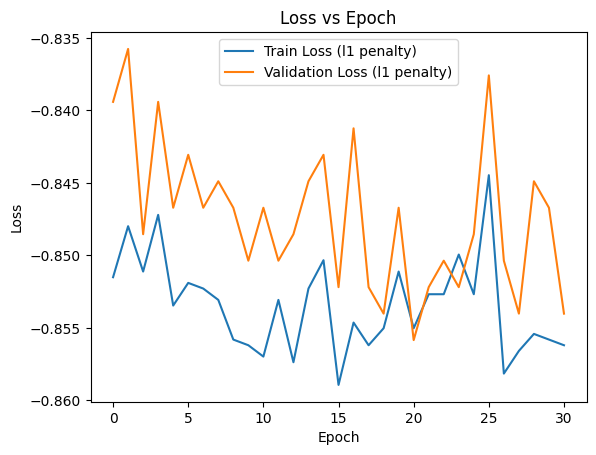

Classification Report for l1 penalty:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       461
           1       0.43      0.03      0.06        88

    accuracy                           0.84       549
   macro avg       0.64      0.51      0.49       549
weighted avg       0.78      0.84      0.78       549

Confusion Matrix for l1 penalty:
 [[457   4]
 [ 85   3]]
Accuracy of l1 penalty model: 0.8378870673952641

Training with l2 penalty:
Early stopping at epoch 11


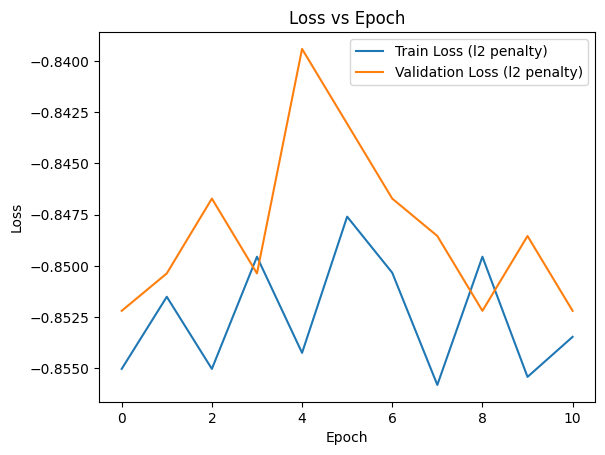

Classification Report for l2 penalty:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       461
           1       0.50      0.02      0.04        88

    accuracy                           0.84       549
   macro avg       0.67      0.51      0.48       549
weighted avg       0.79      0.84      0.77       549

Confusion Matrix for l2 penalty:
 [[459   2]
 [ 86   2]]
Accuracy of l2 penalty model: 0.8397085610200364


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_with_early_stopping(X_train, y_train, X_val, y_val, learning_rate, penalty, alpha, patience=10, max_iter=1000):
    """
    Train SGDClassifier with early stopping.
    
    Parameters:
    - X_train, y_train: Training data
    - X_val, y_val: Validation data
    - learning_rate: Learning rate
    - penalty: Regularization type ('l1', 'l2', 'elasticnet')
    - alpha: Regularization strength
    - patience: Number of epochs to wait before early stopping
    - max_iter: Maximum number of iterations
    
    Returns:
    - model: Trained model
    - train_losses: Training losses over iterations
    - val_losses: Validation losses over iterations
    """
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=learning_rate, penalty=penalty, alpha=alpha, max_iter=1, warm_start=True)
    train_losses = []
    val_losses = []
    
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(max_iter):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Compute training and validation losses
        train_loss = -model.score(X_train, y_train)
        val_loss = -model.score(X_val, y_val)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Check early stopping criteria
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break
    
    return model, train_losses, val_losses

def plot_performance(train_losses, val_losses, label):
    """
    Plot training and validation losses.
    
    Parameters:
    - train_losses: List of training losses
    - val_losses: List of validation losses
    - label: Label for the plot
    """
    plt.plot(train_losses, label=f'Train Loss ({label})')
    plt.plot(val_losses, label=f'Validation Loss ({label})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    plt.show()

# Load your data
data = pd.read_csv('Heart Disease.csv')
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Parameters for training
learning_rate = 0.01
alpha = 0.0001
penalties = ['l1', 'l2']
for penalty in penalties:
    print(f"\nTraining with {penalty} penalty:")
    model, train_losses, val_losses = train_with_early_stopping(
        X_train_scaled, y_train, X_val_scaled, y_val,
        learning_rate=learning_rate, penalty=penalty, alpha=alpha, patience=10, max_iter=10000
    )
    plot_performance(train_losses, val_losses, f'{penalty} penalty')

    # Evaluate the model
    y_test_pred = model.predict(X_test_scaled)
    print(f"Classification Report for {penalty} penalty:\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix for {} penalty:\n".format(penalty), confusion_matrix(y_test, y_test_pred))
    print("Accuracy of {} penalty model:".format(penalty), accuracy_score(y_test, y_test_pred))


Training with learning_rate=0.001, penalty=l1, alpha=0.0001
Early stopping at epoch 13 with validation loss -0.8558


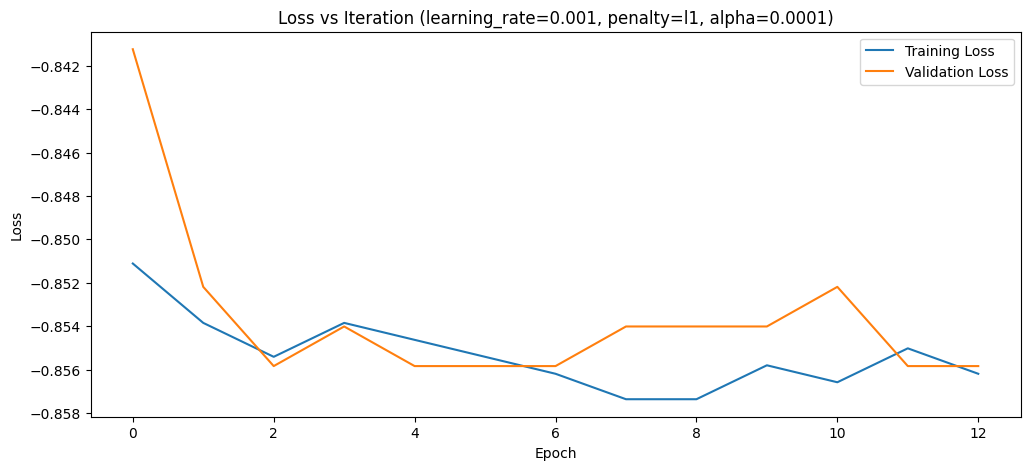

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.45      0.06      0.10        88

    accuracy                           0.84       549
   macro avg       0.65      0.52      0.51       549
weighted avg       0.78      0.84      0.78       549

Accuracy of Model:  0.8378870673952641
Confusion Matrix:
 [[455   6]
 [ 83   5]]
Training with learning_rate=0.001, penalty=l1, alpha=0.001
Early stopping at epoch 13 with validation loss -0.8558


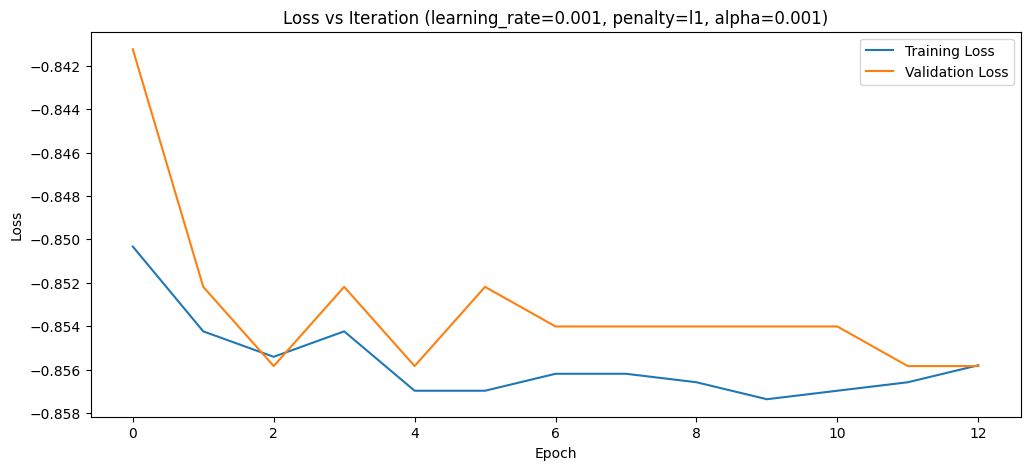

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       461
           1       0.38      0.03      0.06        88

    accuracy                           0.84       549
   macro avg       0.61      0.51      0.49       549
weighted avg       0.77      0.84      0.77       549

Accuracy of Model:  0.8360655737704918
Confusion Matrix:
 [[456   5]
 [ 85   3]]
Training with learning_rate=0.001, penalty=l2, alpha=0.0001
Early stopping at epoch 17 with validation loss -0.8558


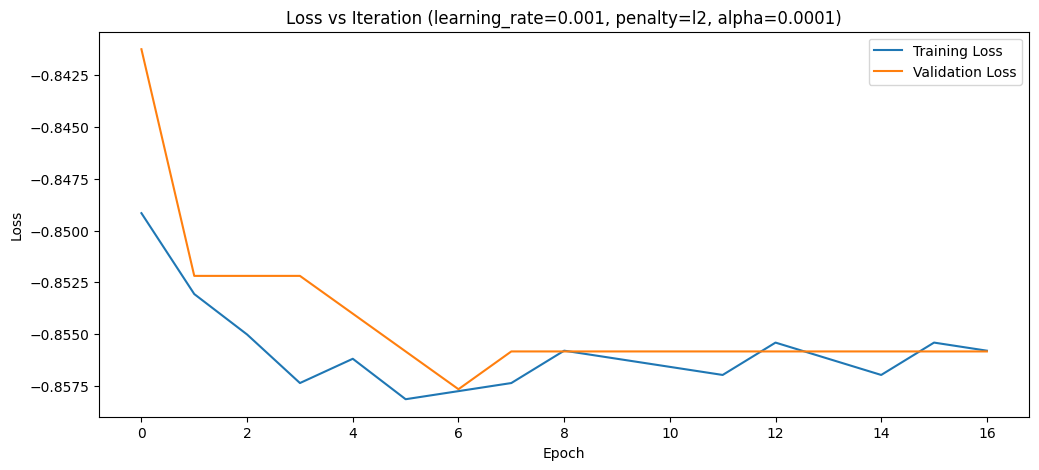

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.57      0.05      0.08        88

    accuracy                           0.84       549
   macro avg       0.71      0.52      0.50       549
weighted avg       0.80      0.84      0.78       549

Accuracy of Model:  0.8415300546448088
Confusion Matrix:
 [[458   3]
 [ 84   4]]
Training with learning_rate=0.001, penalty=l2, alpha=0.001
Early stopping at epoch 15 with validation loss -0.8558


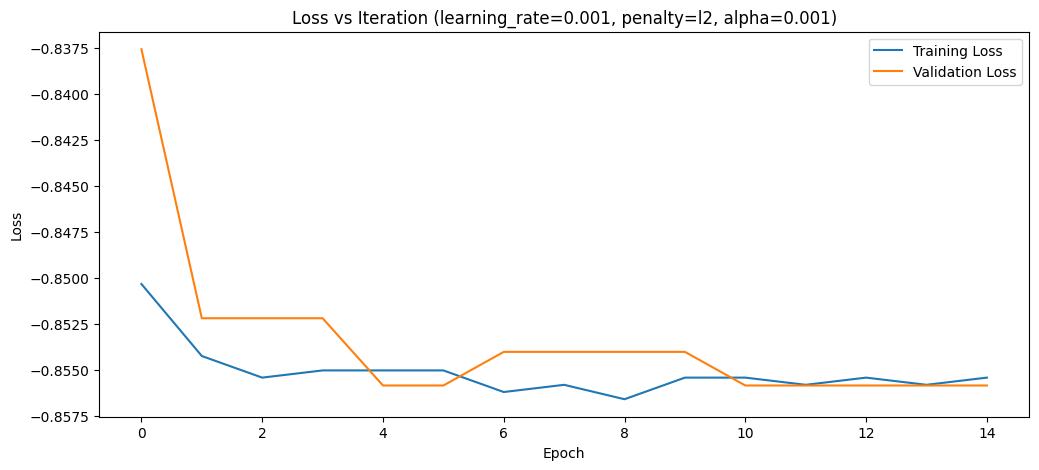

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       461
           1       0.50      0.05      0.08        88

    accuracy                           0.84       549
   macro avg       0.67      0.52      0.50       549
weighted avg       0.79      0.84      0.78       549

Accuracy of Model:  0.8397085610200364
Confusion Matrix:
 [[457   4]
 [ 84   4]]
Training with learning_rate=0.01, penalty=l1, alpha=0.0001
Early stopping at epoch 21 with validation loss -0.8412


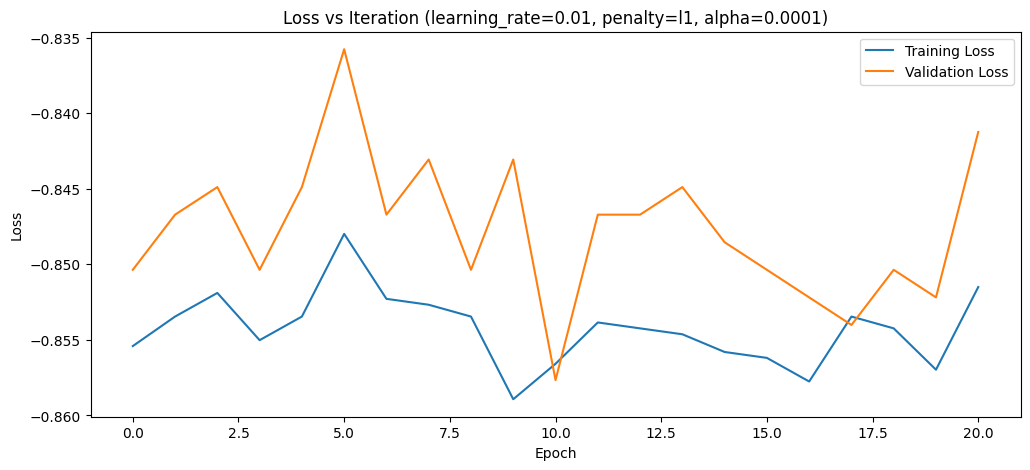

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       461
           1       0.29      0.06      0.10        88

    accuracy                           0.83       549
   macro avg       0.57      0.52      0.50       549
weighted avg       0.76      0.83      0.77       549

Accuracy of Model:  0.8269581056466302
Confusion Matrix:
 [[449  12]
 [ 83   5]]
Training with learning_rate=0.01, penalty=l1, alpha=0.001
Early stopping at epoch 19 with validation loss -0.8449


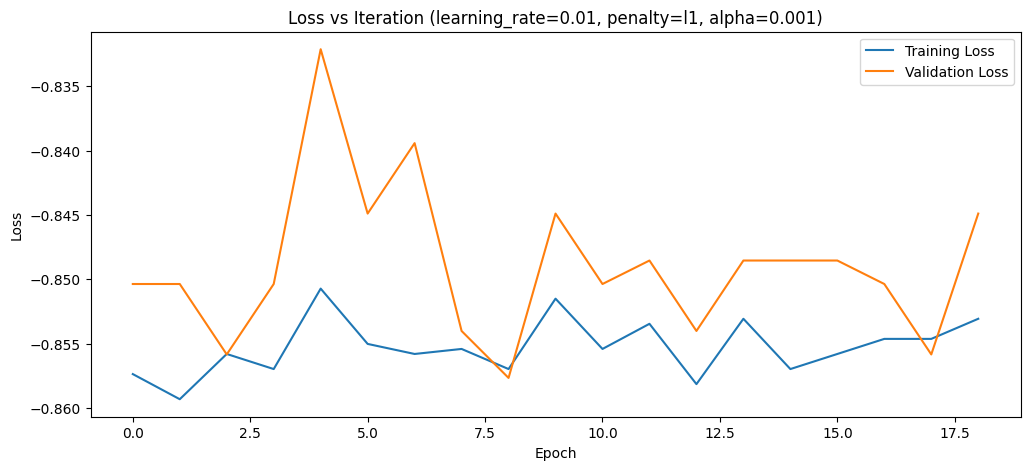

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       461
           1       0.33      0.05      0.08        88

    accuracy                           0.83       549
   macro avg       0.59      0.51      0.49       549
weighted avg       0.76      0.83      0.78       549

Accuracy of Model:  0.8324225865209471
Confusion Matrix:
 [[453   8]
 [ 84   4]]
Training with learning_rate=0.01, penalty=l2, alpha=0.0001
Early stopping at epoch 11 with validation loss -0.8376


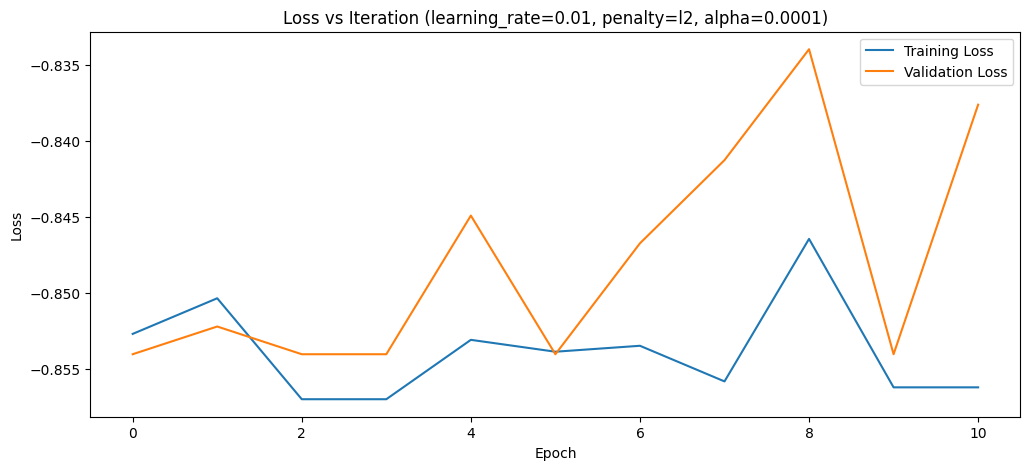

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       461
           1       0.33      0.09      0.14        88

    accuracy                           0.83       549
   macro avg       0.59      0.53      0.52       549
weighted avg       0.77      0.83      0.78       549

Accuracy of Model:  0.825136612021858
Confusion Matrix:
 [[445  16]
 [ 80   8]]
Training with learning_rate=0.01, penalty=l2, alpha=0.001
Early stopping at epoch 14 with validation loss -0.8522


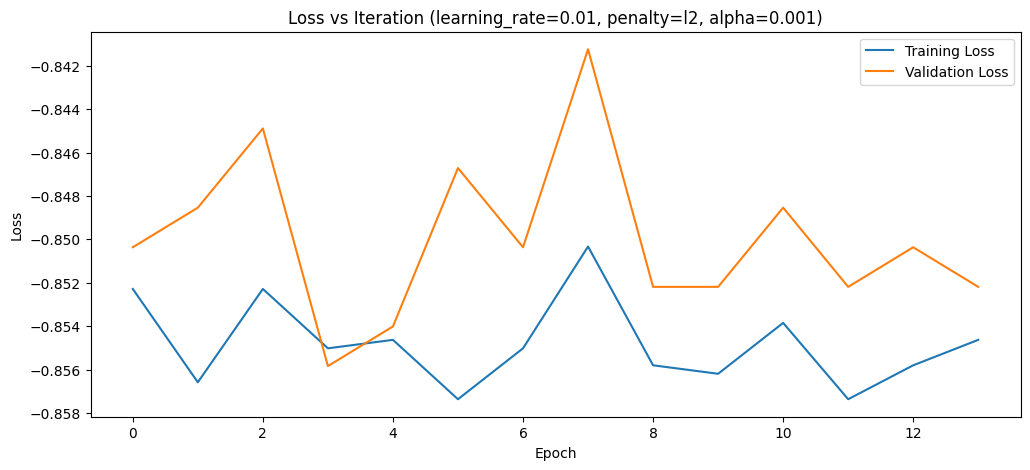

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       461
           1       0.40      0.09      0.15        88

    accuracy                           0.83       549
   macro avg       0.62      0.53      0.53       549
weighted avg       0.78      0.83      0.79       549

Accuracy of Model:  0.8324225865209471
Confusion Matrix:
 [[449  12]
 [ 80   8]]
Training with learning_rate=0.1, penalty=l1, alpha=0.0001
Early stopping at epoch 13 with validation loss -0.8358


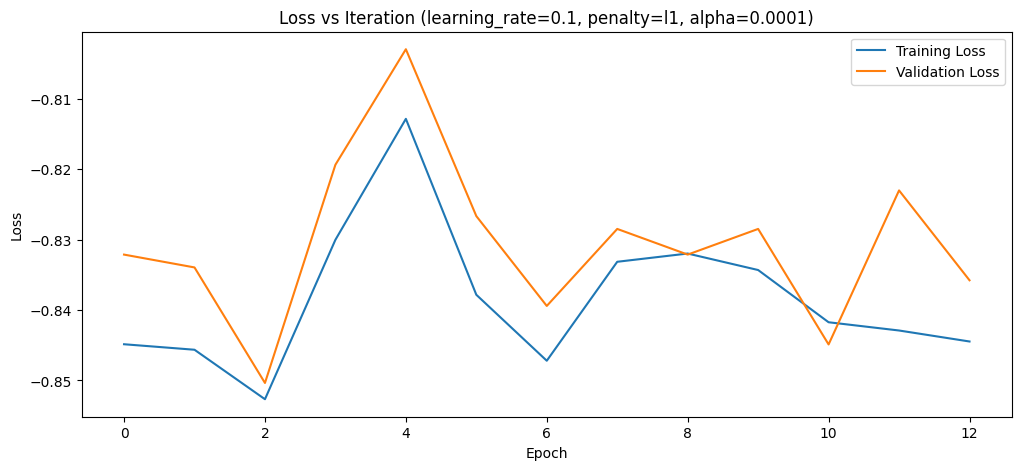

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       461
           1       0.24      0.11      0.15        88

    accuracy                           0.80       549
   macro avg       0.54      0.52      0.52       549
weighted avg       0.75      0.80      0.77       549

Accuracy of Model:  0.7996357012750456
Confusion Matrix:
 [[429  32]
 [ 78  10]]
Training with learning_rate=0.1, penalty=l1, alpha=0.001
Early stopping at epoch 26 with validation loss -0.8376


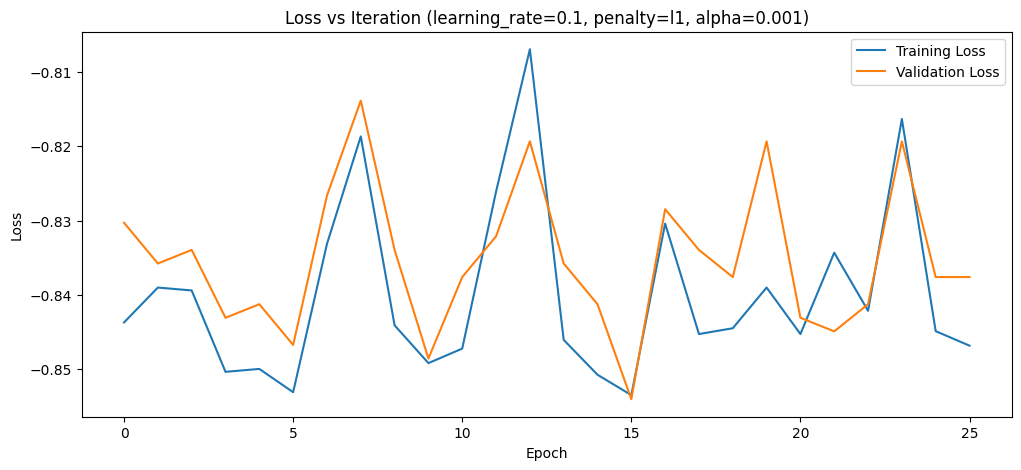

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.56      0.06      0.10        88

    accuracy                           0.84       549
   macro avg       0.70      0.52      0.51       549
weighted avg       0.80      0.84      0.78       549

Accuracy of Model:  0.8415300546448088
Confusion Matrix:
 [[457   4]
 [ 83   5]]
Training with learning_rate=0.1, penalty=l2, alpha=0.0001
Early stopping at epoch 12 with validation loss -0.8376


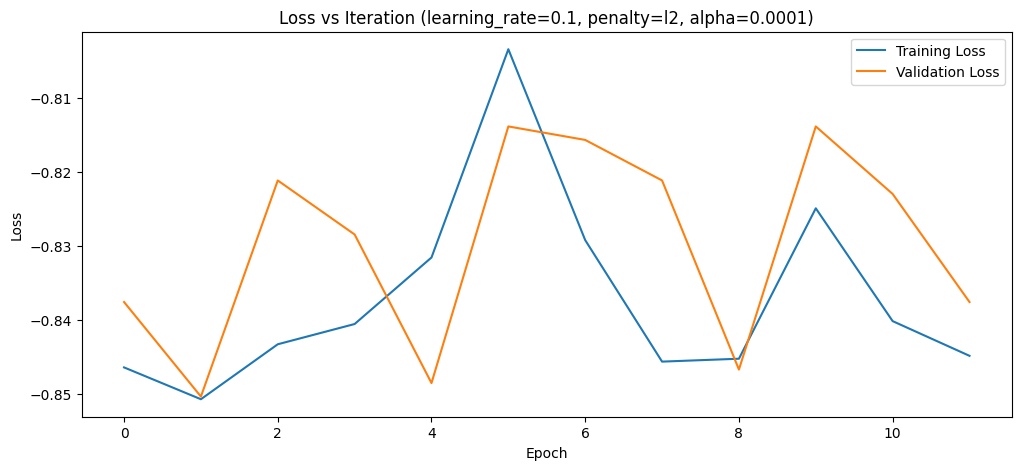

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       461
           1       0.19      0.03      0.06        88

    accuracy                           0.82       549
   macro avg       0.51      0.50      0.48       549
weighted avg       0.74      0.82      0.77       549

Accuracy of Model:  0.8214936247723132
Confusion Matrix:
 [[448  13]
 [ 85   3]]
Training with learning_rate=0.1, penalty=l2, alpha=0.001
Early stopping at epoch 22 with validation loss -0.8394


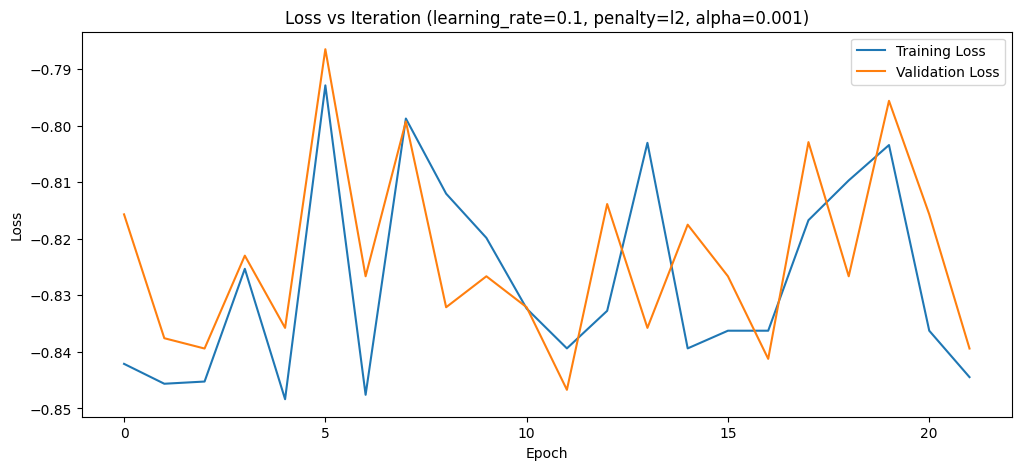

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       461
           1       0.20      0.08      0.11        88

    accuracy                           0.80       549
   macro avg       0.52      0.51      0.50       549
weighted avg       0.74      0.80      0.76       549

Accuracy of Model:  0.8014571948998178
Confusion Matrix:
 [[433  28]
 [ 81   7]]


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to train SGDClassifier with early stopping
def train_with_early_stopping(X_train, y_train, X_val, y_val, learning_rate, penalty, alpha, patience=10, max_iter=1000):
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=learning_rate, penalty=penalty, alpha=alpha, max_iter=1, warm_start=True)
    train_losses = []
    val_losses = []
    
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(max_iter):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Compute training and validation losses
        train_loss = -model.score(X_train, y_train)
        val_loss = -model.score(X_val, y_val)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Check early stopping criteria
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch + 1} with validation loss {val_loss:.4f}")
                break
    
    return model, train_losses, val_losses

# Experiment with different learning rates and regularization
learning_rates = [0.001, 0.01, 0.1]
penalties = ['l1', 'l2']
alphas = [0.0001, 0.001]

for learning_rate in learning_rates:
    for penalty in penalties:
        for alpha in alphas:
            print(f"Training with learning_rate={learning_rate}, penalty={penalty}, alpha={alpha}")
            
            # Train with early stopping
            model, train_losses, val_losses = train_with_early_stopping(
                X_train_scaled, y_train, X_val_scaled, y_val,
                learning_rate=learning_rate, penalty=penalty, alpha=alpha, patience=10, max_iter=1000
            )
            
            # Plot Loss vs Iteration
            plt.figure(figsize=(12, 5))
            plt.plot(train_losses, label='Training Loss')
            plt.plot(val_losses, label='Validation Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(f'Loss vs Iteration (learning_rate={learning_rate}, penalty={penalty}, alpha={alpha})')
            plt.legend()
            plt.show()
            
            # Evaluate the model on the test set
            y_pred = model.predict(X_test_scaled)
            print("Classification Report:\n", classification_report(y_test, y_pred))
            print("Accuracy of Model: ", accuracy_score(y_test, y_pred))
            print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training with learning_rate=0.001, penalty=l1, alpha=0.0001
Early stopping at epoch 55 with validation loss -0.8558


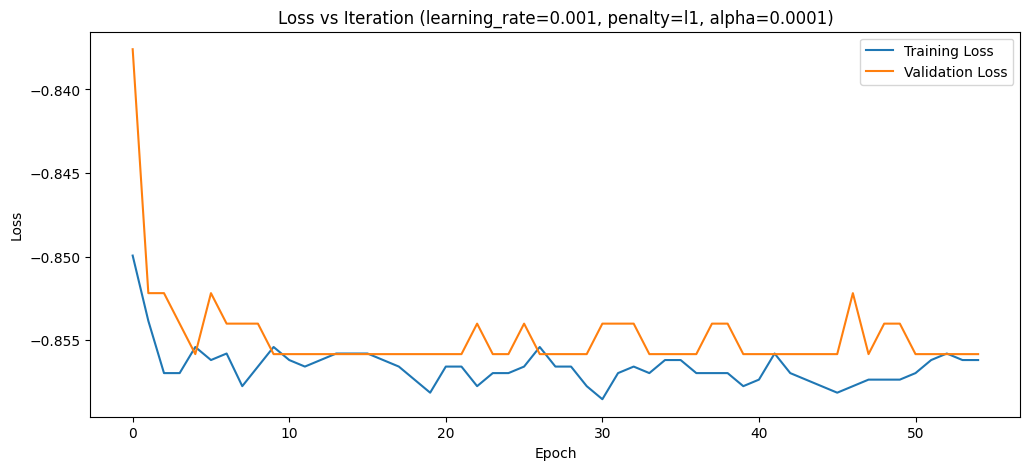

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       461
           1       0.46      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.65      0.53      0.51       549
weighted avg       0.79      0.84      0.78       549

Accuracy of Model:  0.8378870673952641
Confusion Matrix:
 [[454   7]
 [ 82   6]]
Training with learning_rate=0.001, penalty=l1, alpha=0.001
Early stopping at epoch 56 with validation loss -0.8558


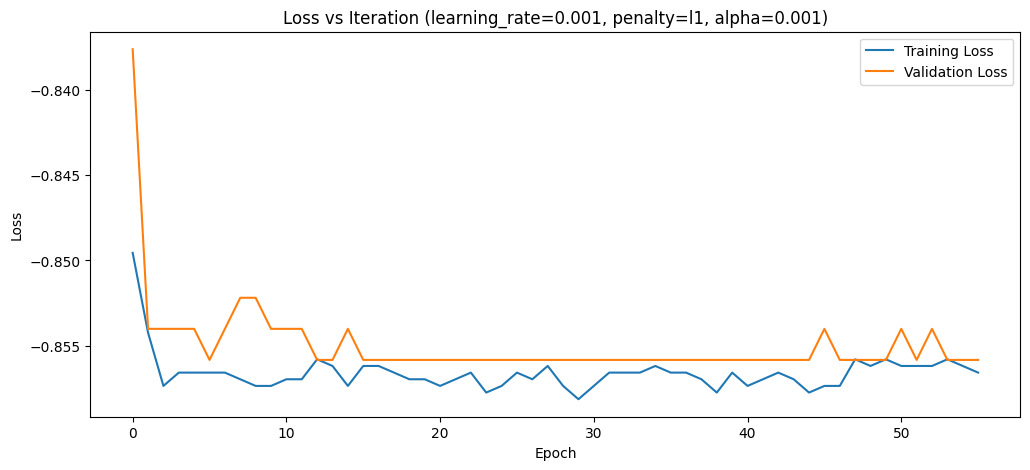

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.60      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.72      0.53      0.52       549
weighted avg       0.81      0.84      0.79       549

Accuracy of Model:  0.843351548269581
Confusion Matrix:
 [[457   4]
 [ 82   6]]
Training with learning_rate=0.001, penalty=l2, alpha=0.0001
Early stopping at epoch 59 with validation loss -0.8558


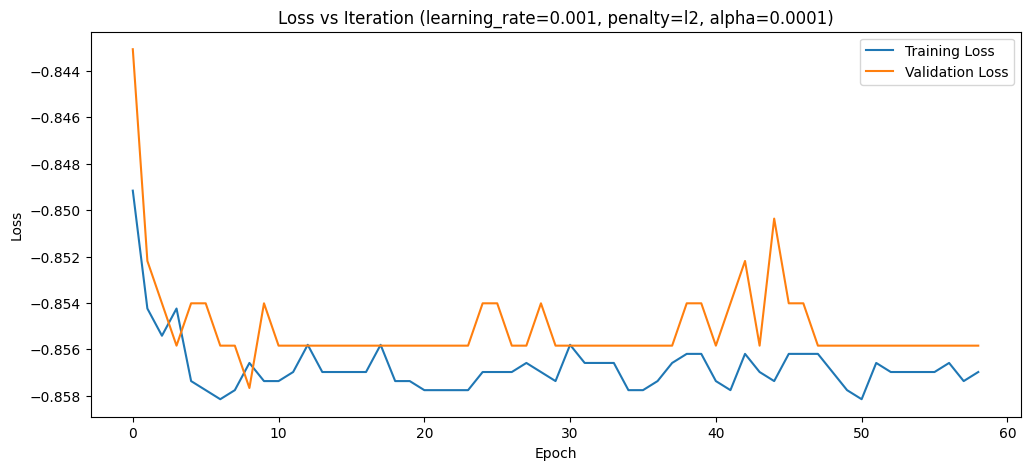

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.55      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.70      0.53      0.52       549
weighted avg       0.80      0.84      0.79       549

Accuracy of Model:  0.8415300546448088
Confusion Matrix:
 [[456   5]
 [ 82   6]]
Training with learning_rate=0.001, penalty=l2, alpha=0.001
Early stopping at epoch 59 with validation loss -0.8558


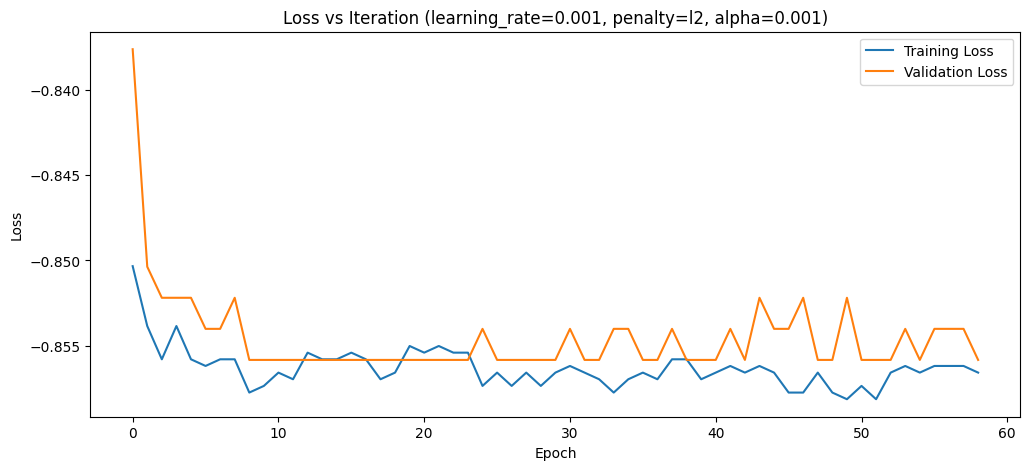

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.50      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.67      0.53      0.52       549
weighted avg       0.79      0.84      0.78       549

Accuracy of Model:  0.8397085610200364
Confusion Matrix:
 [[455   6]
 [ 82   6]]
Training with learning_rate=0.01, penalty=l1, alpha=0.0001
Early stopping at epoch 61 with validation loss -0.8485


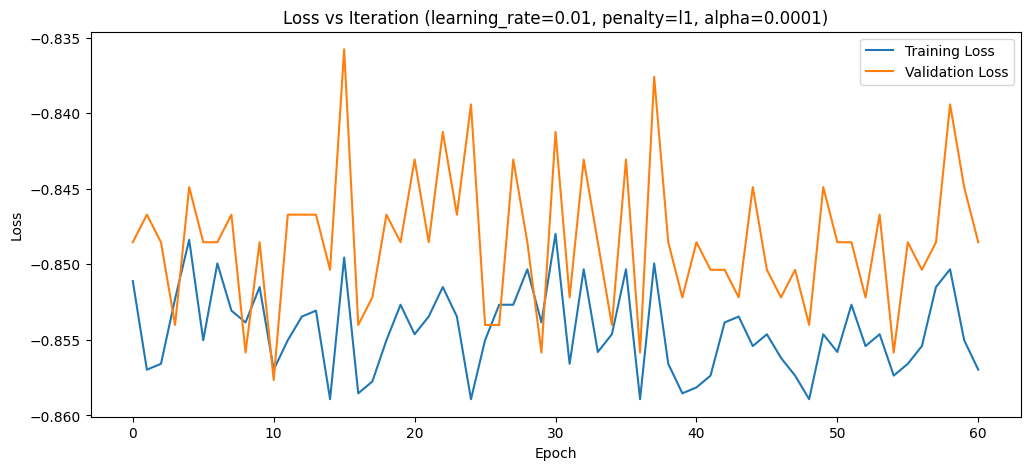

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       461
           1       0.40      0.02      0.04        88

    accuracy                           0.84       549
   macro avg       0.62      0.51      0.48       549
weighted avg       0.77      0.84      0.77       549

Accuracy of Model:  0.8378870673952641
Confusion Matrix:
 [[458   3]
 [ 86   2]]
Training with learning_rate=0.01, penalty=l1, alpha=0.001
Early stopping at epoch 53 with validation loss -0.8449


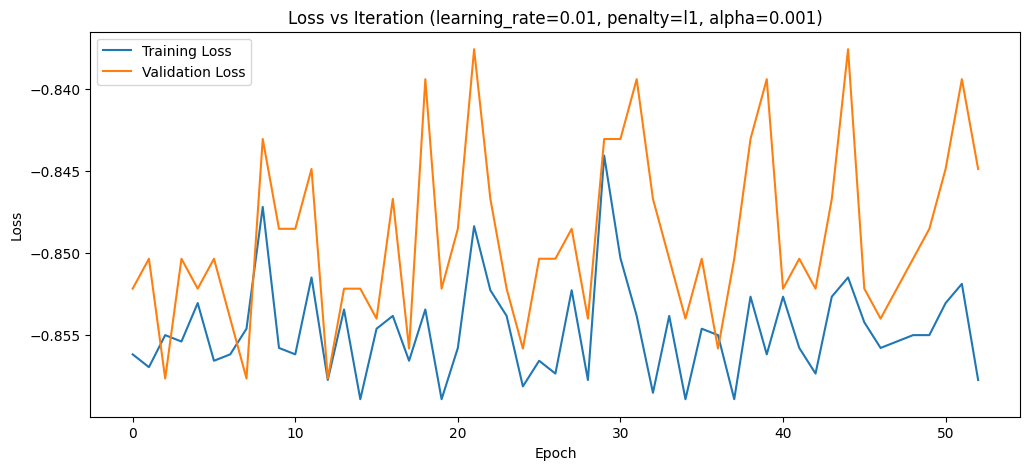

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.55      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.70      0.53      0.52       549
weighted avg       0.80      0.84      0.79       549

Accuracy of Model:  0.8415300546448088
Confusion Matrix:
 [[456   5]
 [ 82   6]]
Training with learning_rate=0.01, penalty=l2, alpha=0.0001
Early stopping at epoch 62 with validation loss -0.8394


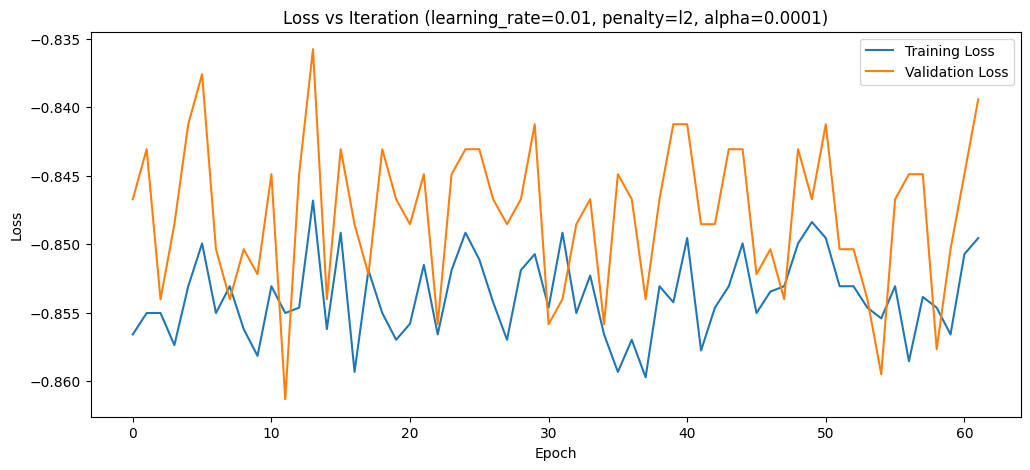

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89       461
           1       0.26      0.09      0.13        88

    accuracy                           0.81       549
   macro avg       0.55      0.52      0.51       549
weighted avg       0.75      0.81      0.77       549

Accuracy of Model:  0.8123861566484517
Confusion Matrix:
 [[438  23]
 [ 80   8]]
Training with learning_rate=0.01, penalty=l2, alpha=0.001
Early stopping at epoch 56 with validation loss -0.8449


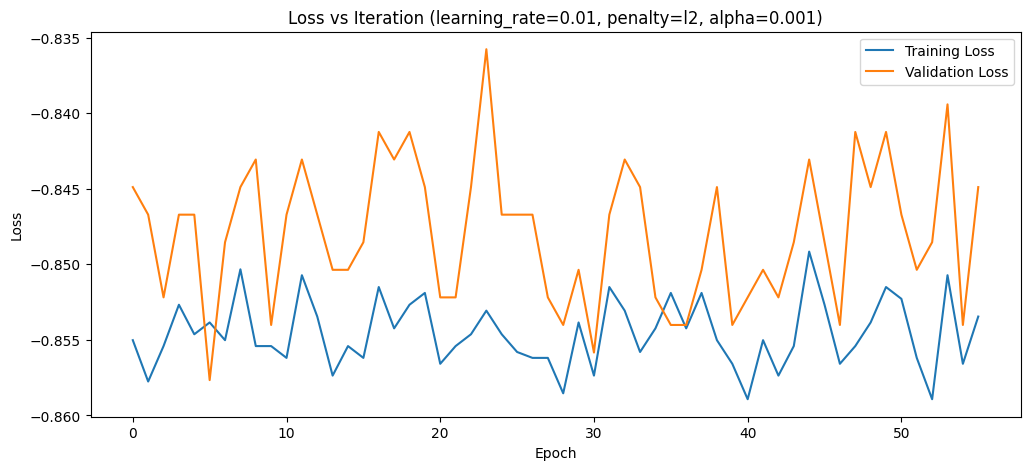

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       461
           1       0.25      0.01      0.02        88

    accuracy                           0.84       549
   macro avg       0.55      0.50      0.47       549
weighted avg       0.75      0.84      0.77       549

Accuracy of Model:  0.8360655737704918
Confusion Matrix:
 [[458   3]
 [ 87   1]]
Training with learning_rate=0.1, penalty=l1, alpha=0.0001
Early stopping at epoch 86 with validation loss -0.8303


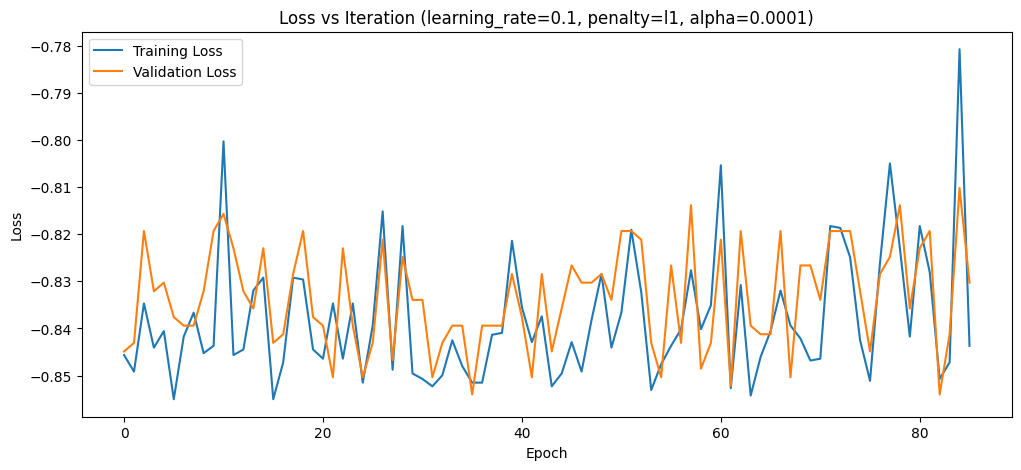

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       461
           1       0.17      0.03      0.06        88

    accuracy                           0.82       549
   macro avg       0.50      0.50      0.48       549
weighted avg       0.73      0.82      0.76       549

Accuracy of Model:  0.8178506375227687
Confusion Matrix:
 [[446  15]
 [ 85   3]]
Training with learning_rate=0.1, penalty=l1, alpha=0.001
Early stopping at epoch 58 with validation loss -0.7774


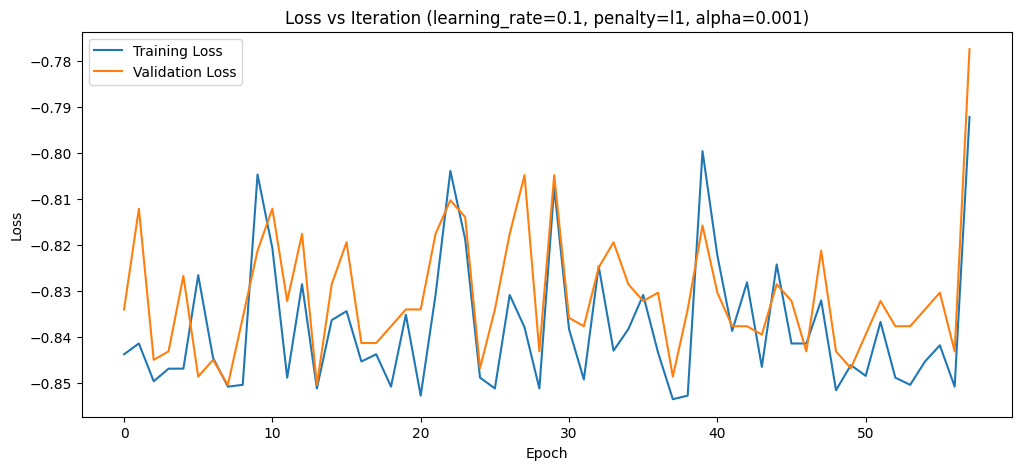

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       461
           1       0.24      0.18      0.21        88

    accuracy                           0.77       549
   macro avg       0.54      0.53      0.54       549
weighted avg       0.75      0.77      0.76       549

Accuracy of Model:  0.7741347905282332
Confusion Matrix:
 [[409  52]
 [ 72  16]]
Training with learning_rate=0.1, penalty=l2, alpha=0.0001
Early stopping at epoch 52 with validation loss -0.7956


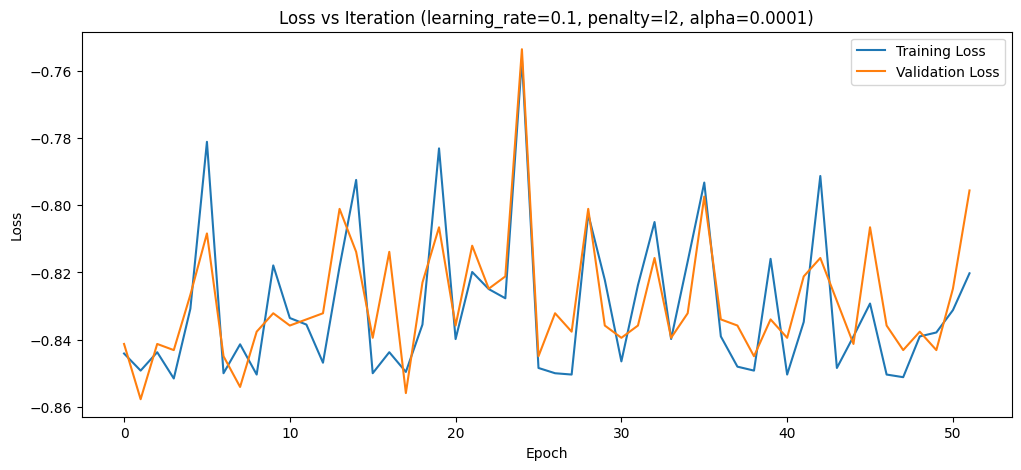

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       461
           1       0.32      0.24      0.27        88

    accuracy                           0.80       549
   macro avg       0.59      0.57      0.58       549
weighted avg       0.78      0.80      0.79       549

Accuracy of Model:  0.7978142076502732
Confusion Matrix:
 [[417  44]
 [ 67  21]]
Training with learning_rate=0.1, penalty=l2, alpha=0.001
Early stopping at epoch 72 with validation loss -0.8120


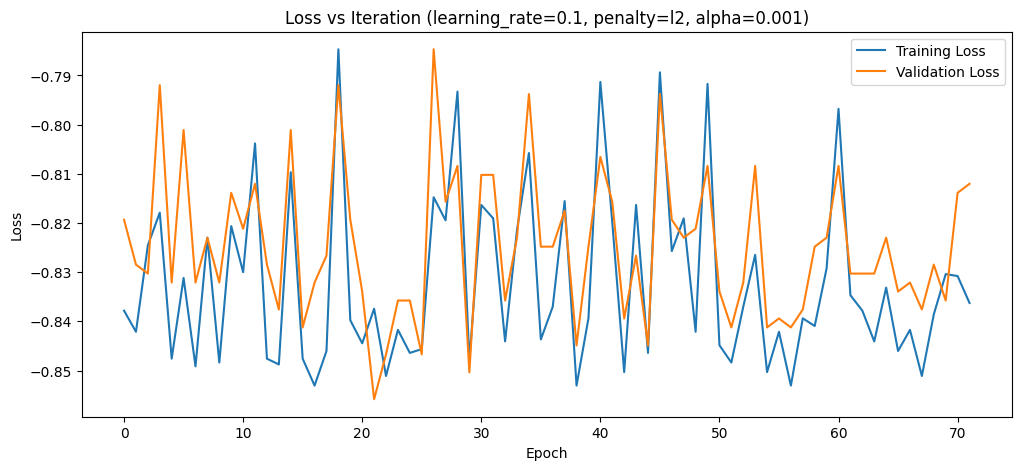

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       461
           1       0.31      0.12      0.18        88

    accuracy                           0.81       549
   macro avg       0.58      0.54      0.54       549
weighted avg       0.76      0.81      0.78       549

Accuracy of Model:  0.8142076502732241
Confusion Matrix:
 [[436  25]
 [ 77  11]]


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to train SGDClassifier with early stopping and predefined iteration stops
def train_with_early_stopping(X_train, y_train, X_val, y_val, learning_rate, penalty, alpha, max_iter, early_stopping_iterations):
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=learning_rate, penalty=penalty, alpha=alpha, max_iter=1, warm_start=True)
    train_losses = []
    val_losses = []
    
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    patience = 50  # Adjust patience for your needs
    
    for epoch in range(max_iter):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Compute training and validation losses
        train_loss = -model.score(X_train, y_train)
        val_loss = -model.score(X_val, y_val)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Check early stopping criteria
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch + 1} with validation loss {val_loss:.4f}")
                break
        
        # Stop at specified iterations
        if (epoch + 1) in early_stopping_iterations:
            print(f"Stopping at iteration {epoch + 1} as specified")
            break
    
    return model, train_losses, val_losses

# Experiment with different learning rates and regularization
learning_rates = [0.001, 0.01, 0.1]
penalties = ['l1', 'l2']
alphas = [0.0001, 0.001]
early_stopping_iterations = [500, 1000, 5000]  # Specific iterations to stop

for learning_rate in learning_rates:
    for penalty in penalties:
        for alpha in alphas:
            print(f"Training with learning_rate={learning_rate}, penalty={penalty}, alpha={alpha}")
            
            # Train with early stopping
            model, train_losses, val_losses = train_with_early_stopping(
                X_train_scaled, y_train, X_val_scaled, y_val,
                learning_rate=learning_rate, penalty=penalty, alpha=alpha, max_iter=5000, early_stopping_iterations=early_stopping_iterations
            )
            
            # Plot Loss vs Iteration
            plt.figure(figsize=(12, 5))
            plt.plot(train_losses, label='Training Loss')
            plt.plot(val_losses, label='Validation Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(f'Loss vs Iteration (learning_rate={learning_rate}, penalty={penalty}, alpha={alpha})')
            plt.legend()
            plt.show()
            
            # Evaluate the model on the test set
            y_pred = model.predict(X_test_scaled)
            print("Classification Report:\n", classification_report(y_test, y_pred))
            print("Accuracy of Model: ", accuracy_score(y_test, y_pred))
            print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Training with learning_rate=0.001, penalty=l1, alpha=0.0001
Early stopping at epoch 507 with validation loss -0.8558


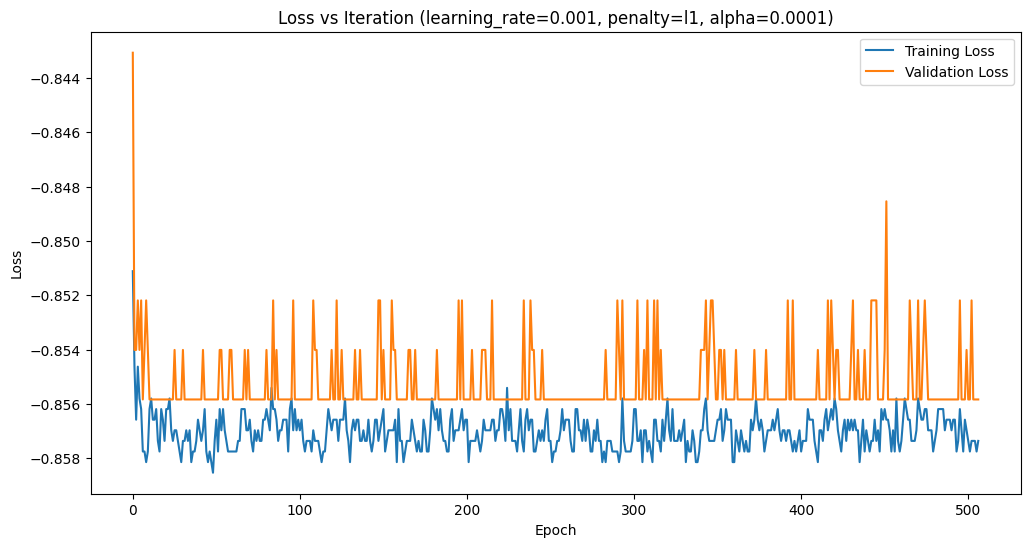

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       461
           1       0.43      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.64      0.53      0.51       549
weighted avg       0.78      0.84      0.78       549

Accuracy of Model:  0.8360655737704918
Confusion Matrix:
 [[453   8]
 [ 82   6]]

Training with learning_rate=0.001, penalty=l1, alpha=0.001
Early stopping at epoch 504 with validation loss -0.8558


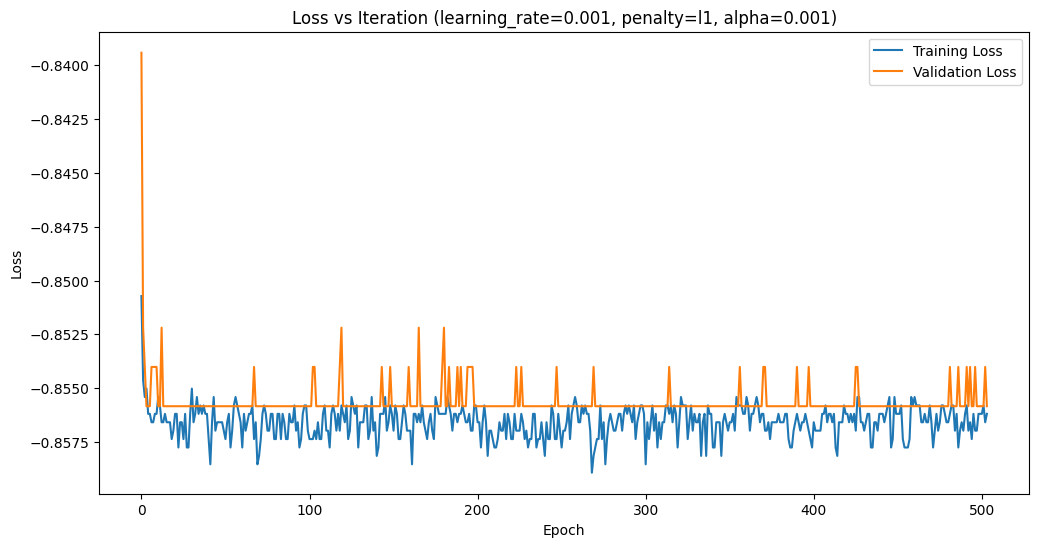

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.60      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.72      0.53      0.52       549
weighted avg       0.81      0.84      0.79       549

Accuracy of Model:  0.843351548269581
Confusion Matrix:
 [[457   4]
 [ 82   6]]

Training with learning_rate=0.001, penalty=l2, alpha=0.0001
Early stopping at epoch 504 with validation loss -0.8540


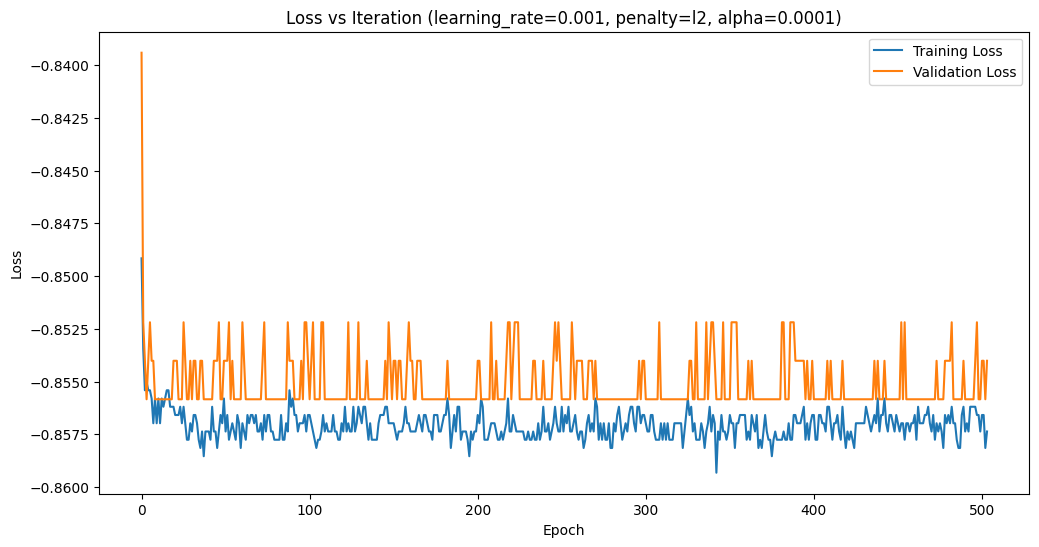

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       461
           1       0.43      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.64      0.53      0.51       549
weighted avg       0.78      0.84      0.78       549

Accuracy of Model:  0.8360655737704918
Confusion Matrix:
 [[453   8]
 [ 82   6]]

Training with learning_rate=0.001, penalty=l2, alpha=0.001
Early stopping at epoch 512 with validation loss -0.8558


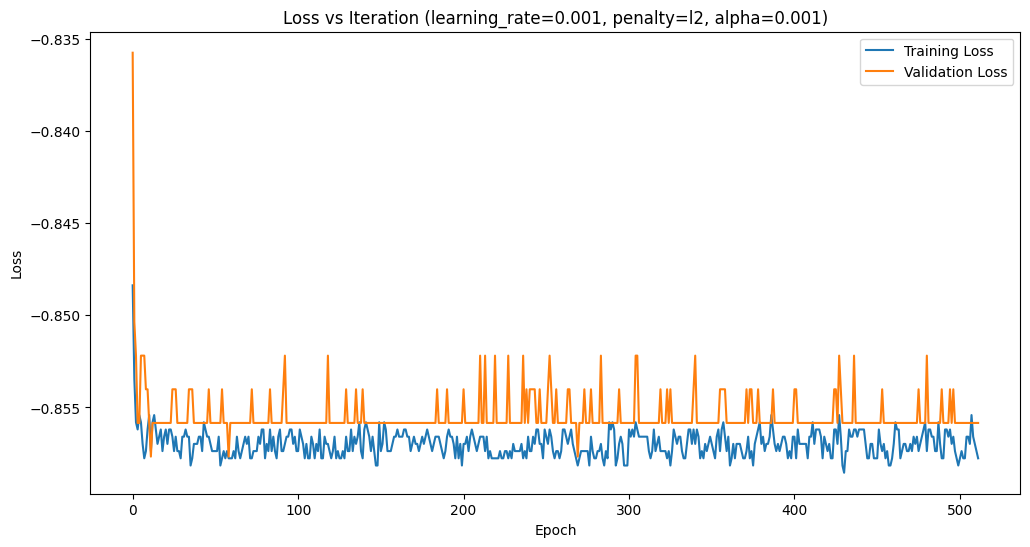

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.60      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.72      0.53      0.52       549
weighted avg       0.81      0.84      0.79       549

Accuracy of Model:  0.843351548269581
Confusion Matrix:
 [[457   4]
 [ 82   6]]

Training with learning_rate=0.01, penalty=l1, alpha=0.0001
Early stopping at epoch 502 with validation loss -0.8504


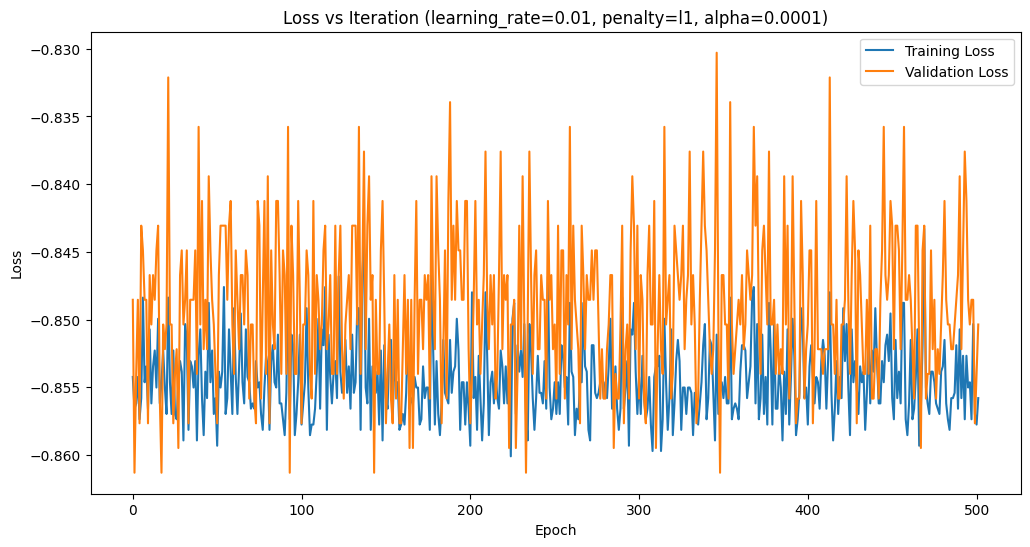

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       461
           1       0.36      0.06      0.10        88

    accuracy                           0.83       549
   macro avg       0.60      0.52      0.50       549
weighted avg       0.77      0.83      0.78       549

Accuracy of Model:  0.8324225865209471
Confusion Matrix:
 [[452   9]
 [ 83   5]]

Training with learning_rate=0.01, penalty=l1, alpha=0.001
Early stopping at epoch 883 with validation loss -0.8595


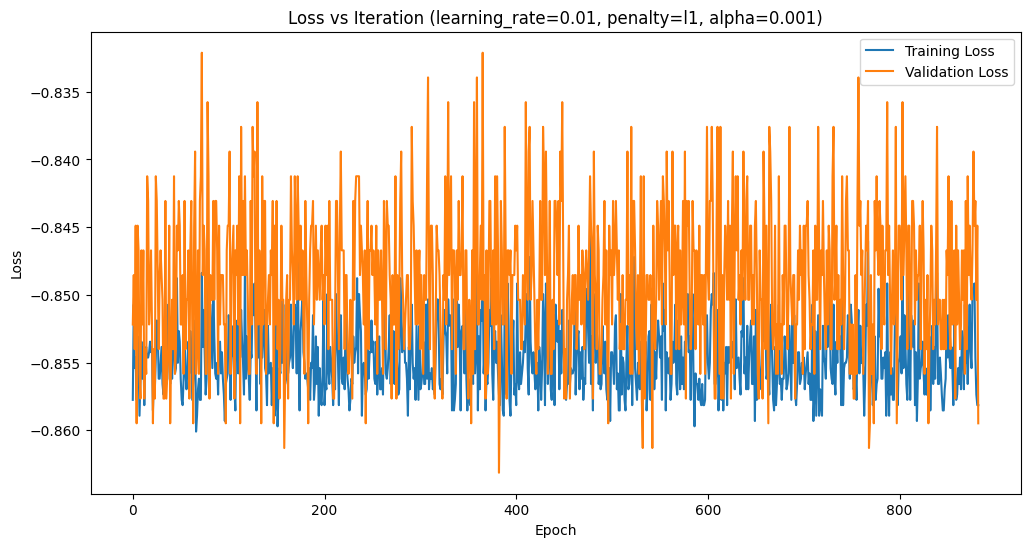

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       461
           1       0.43      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.64      0.53      0.51       549
weighted avg       0.78      0.84      0.78       549

Accuracy of Model:  0.8360655737704918
Confusion Matrix:
 [[453   8]
 [ 82   6]]

Training with learning_rate=0.01, penalty=l2, alpha=0.0001
Early stopping at epoch 596 with validation loss -0.8449


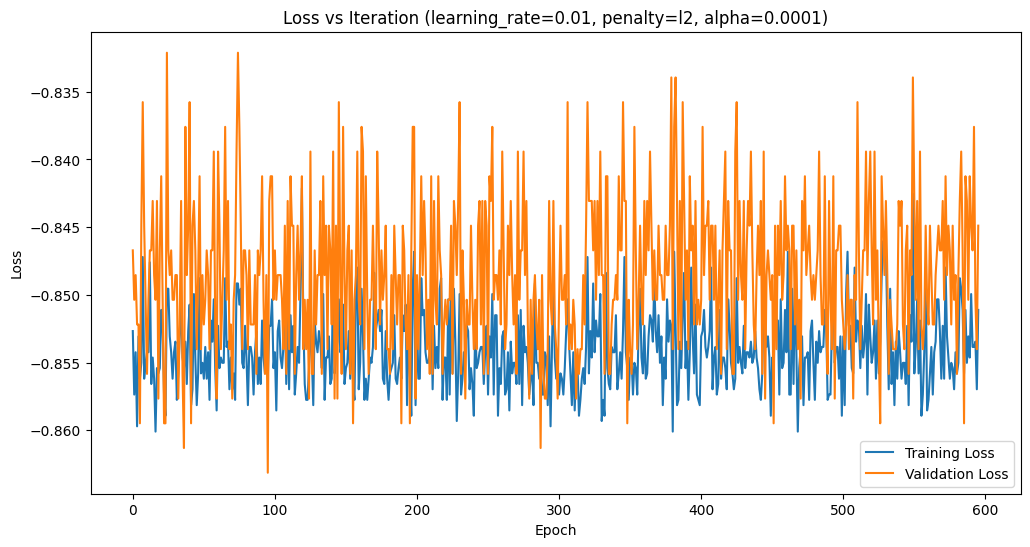

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       461
           1       0.30      0.08      0.13        88

    accuracy                           0.82       549
   macro avg       0.58      0.52      0.51       549
weighted avg       0.76      0.82      0.78       549

Accuracy of Model:  0.8233151183970856
Confusion Matrix:
 [[445  16]
 [ 81   7]]

Training with learning_rate=0.01, penalty=l2, alpha=0.001
Early stopping at epoch 586 with validation loss -0.8540


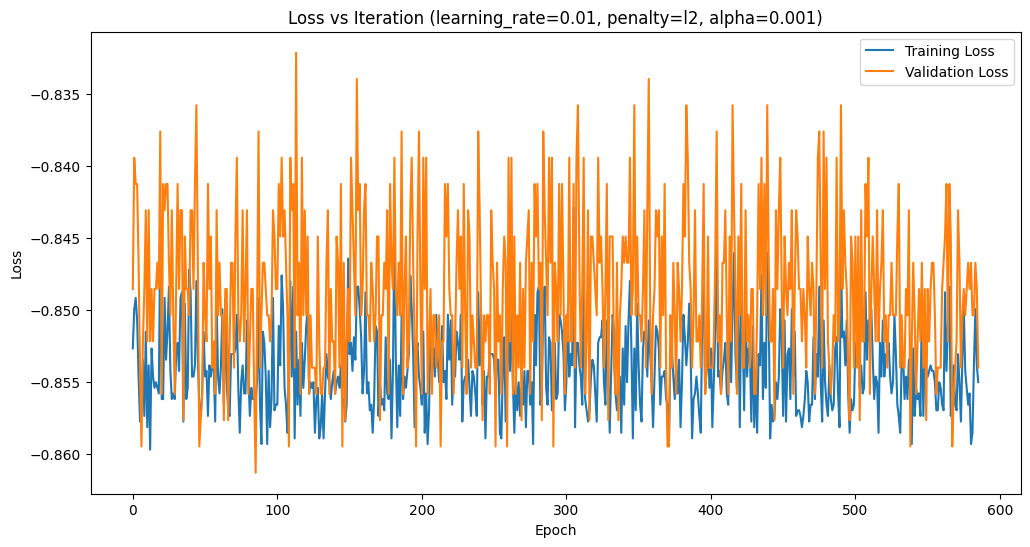

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       461
           1       0.29      0.05      0.08        88

    accuracy                           0.83       549
   macro avg       0.56      0.51      0.49       549
weighted avg       0.75      0.83      0.77       549

Accuracy of Model:  0.8287795992714025
Confusion Matrix:
 [[451  10]
 [ 84   4]]

Training with learning_rate=0.1, penalty=l1, alpha=0.0001
Early stopping at epoch 838 with validation loss -0.8376


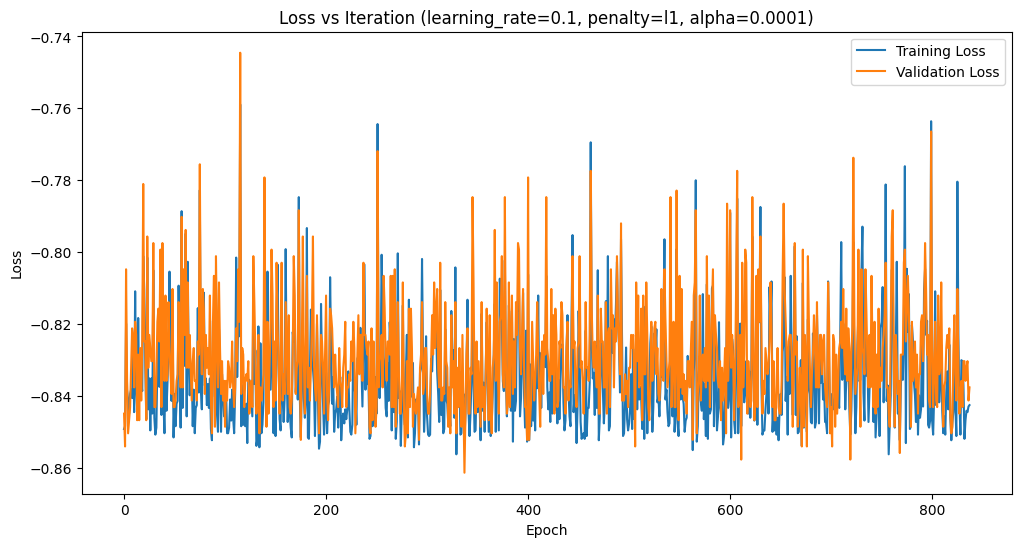

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       461
           1       0.39      0.15      0.21        88

    accuracy                           0.83       549
   macro avg       0.62      0.55      0.56       549
weighted avg       0.78      0.83      0.79       549

Accuracy of Model:  0.8269581056466302
Confusion Matrix:
 [[441  20]
 [ 75  13]]

Training with learning_rate=0.1, penalty=l1, alpha=0.001
Early stopping at epoch 1014 with validation loss -0.8120


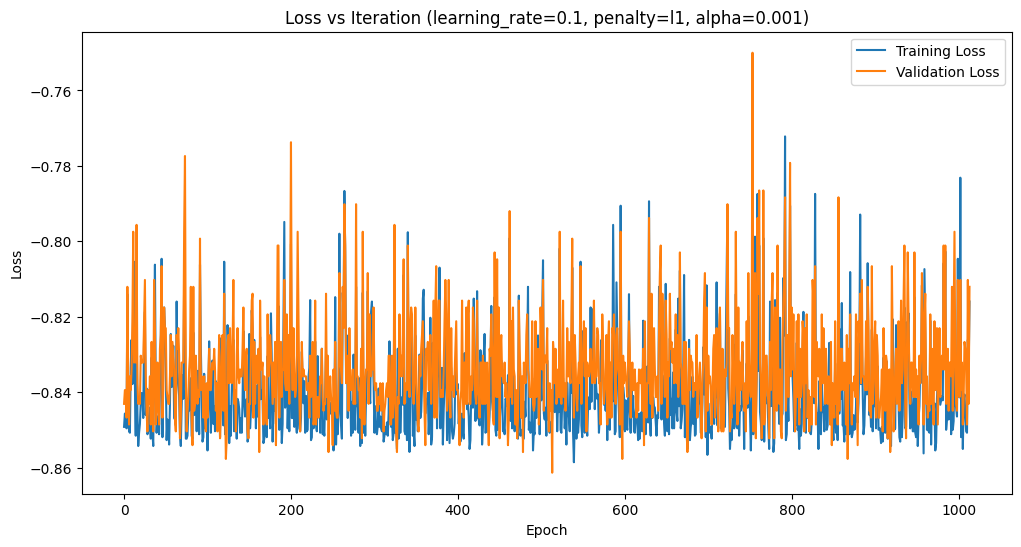

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       461
           1       0.35      0.26      0.30        88

    accuracy                           0.81       549
   macro avg       0.61      0.59      0.59       549
weighted avg       0.78      0.81      0.79       549

Accuracy of Model:  0.8051001821493625
Confusion Matrix:
 [[419  42]
 [ 65  23]]

Training with learning_rate=0.1, penalty=l2, alpha=0.0001
Early stopping at epoch 843 with validation loss -0.8339


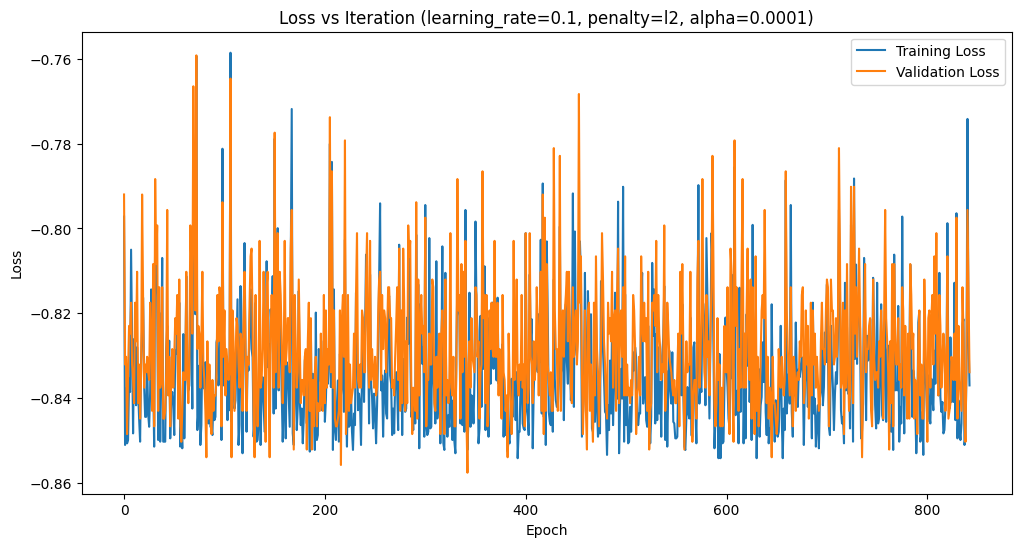

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       461
           1       0.39      0.12      0.19        88

    accuracy                           0.83       549
   macro avg       0.62      0.54      0.55       549
weighted avg       0.78      0.83      0.79       549

Accuracy of Model:  0.8287795992714025
Confusion Matrix:
 [[444  17]
 [ 77  11]]

Training with learning_rate=0.1, penalty=l2, alpha=0.001
Early stopping at epoch 1082 with validation loss -0.8412


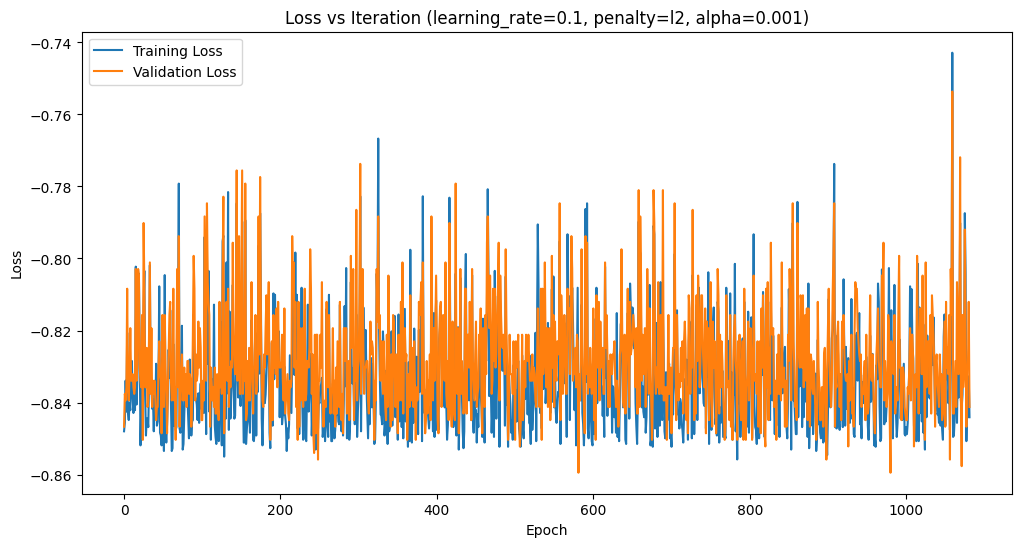

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       461
           1       0.17      0.01      0.02        88

    accuracy                           0.83       549
   macro avg       0.50      0.50      0.46       549
weighted avg       0.73      0.83      0.77       549

Accuracy of Model:  0.8324225865209471
Confusion Matrix:
 [[456   5]
 [ 87   1]]


InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'perceptron', 'epsilon_insensitive', 'squared_epsilon_insensitive', 'log_loss', 'modified_huber', 'hinge', 'squared_hinge', 'squared_error', 'huber'}. Got 'log' instead.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to train SGDClassifier with early stopping
def train_with_early_stopping(X_train, y_train, X_val, y_val, learning_rate, penalty, alpha, max_iter, patience):
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=learning_rate, penalty=penalty, alpha=alpha, max_iter=1, warm_start=True)
    train_losses = []
    val_losses = []
    
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(max_iter):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Compute training and validation losses
        train_loss = -model.score(X_train, y_train)
        val_loss = -model.score(X_val, y_val)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Check early stopping criteria
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch + 1} with validation loss {val_loss:.4f}")
                break
    
    return model, train_losses, val_losses

# Function to plot results
def plot_losses(train_losses, val_losses, title):
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

# Experiment with different learning rates and regularization techniques
learning_rates = [0.001, 0.01, 0.1]
penalties = ['l1', 'l2']
alphas = [0.0001, 0.001]
max_iter = 10000  # Set a high enough max_iter for early stopping to have effect
patience = 500  # Number of epochs with no improvement to wait before stopping

for learning_rate in learning_rates:
    for penalty in penalties:
        for alpha in alphas:
            print(f"\nTraining with learning_rate={learning_rate}, penalty={penalty}, alpha={alpha}")
            
            # Train with early stopping
            model, train_losses, val_losses = train_with_early_stopping(
                X_train_scaled, y_train, X_val_scaled, y_val,
                learning_rate=learning_rate, penalty=penalty, alpha=alpha, max_iter=max_iter, patience=patience
            )
            
            # Plot Loss vs Iteration
            plot_losses(train_losses, val_losses, f'Loss vs Iteration (learning_rate={learning_rate}, penalty={penalty}, alpha={alpha})')
            
            # Evaluate the model on the test set
            y_pred = model.predict(X_test_scaled)
            print("Classification Report:\n", classification_report(y_test, y_pred))
            print("Accuracy of Model: ", accuracy_score(y_test, y_pred))
            print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Train without early stopping for comparison
model = SGDClassifier(loss='log', learning_rate='constant', eta0=0.01, penalty='l2', alpha=0.001, max_iter=5000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("\nTraining without early stopping:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy of Model: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
